# Ejercicio Final: Regresión Lineal Múltiple - Análisis Completo

## Objetivos del Ejercicio

En este ejercicio final integrarás todos los conceptos aprendidos sobre regresión lineal múltiple:

1. **Análisis Exploratorio de Datos (EDA)**
2. **Detección y tratamiento de valores atípicos**
3. **Análisis de correlación y multicolinealidad**
4. **Selección de características**
5. **Construcción y evaluación de modelos**
6. **Técnicas de regularización**
7. **Validación cruzada**
8. **Interpretación de resultados**

---

## Contexto del Problema

Trabajas como **Data Scientist** para una empresa inmobiliaria en Boston. Tu tarea es desarrollar un **modelo predictivo robusto** que ayude a:

- 🏠 **Estimar precios de viviendas** con precisión
- 📊 **Identificar factores clave** que influyen en el precio
- 💡 **Proporcionar insights** para inversiones inmobiliarias
- 🎯 **Optimizar estrategias** de pricing

---

## Instrucciones Generales

- 📝 **Documenta cada paso** con comentarios claros
- 📊 **Crea visualizaciones** interpretables
- 🤔 **Justifica tus decisiones** metodológicas
- 📈 **Compara diferentes enfoques**
- 💼 **Piensa como un profesional** del sector inmobiliario

## Parte 1: Configuración del Entorno y Carga de Datos

In [1]:
# TODO 1.1: Importar todas las librerías necesarias
# Incluye: pandas, numpy, matplotlib, seaborn, sklearn, statsmodels, scipy
# Configura los warnings y el estilo de gráficos

# Librerías básicas para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

# Librerías estadísticas
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from scipy.stats import jarque_bera, shapiro

# Para suprimir warnings y configuración general
import warnings
import joblib

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings('ignore')

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [4]:
# TODO 1.2: Cargar el dataset de Boston Housing
# Muestra información básica: shape, head(), info(), describe()

# Cargar el dataset desde el archivo CSV en la carpeta data
df = pd.read_csv('/Users/davidreyblanco/Software/training/mbit/regression/data/BostonHousing.csv')

print("🏠 INFORMACIÓN BÁSICA DEL DATASET BOSTON HOUSING")
print("=" * 60)

# 1. Dimensiones del dataset
print(f"📊 Dimensiones: {df.shape[0]} observaciones y {df.shape[1]} variables\n")

# 2. Primeras 5 filas
print("👀 Primeras 5 observaciones:")
print(df.head())
print("\n")

# 3. Información general del dataset
print("ℹ️  Información general:")
df.info()
print("\n")

# 4. Estadísticas descriptivas
print("📈 Estadísticas descriptivas:")
print(df.describe())
print("\n")

# 5. Verificar valores faltantes
print("❓ Valores faltantes por columna:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "✅ No hay valores faltantes")
print("\n")

# 6. Tipos de datos
print("🔢 Tipos de variables:")
print(df.dtypes)

# PREGUNTA 1.1: ¿Cuántas observaciones y variables tienes?
# PREGUNTA 1.2: ¿Hay valores faltantes en el dataset?
# PREGUNTA 1.3: ¿Qué tipo de variables tienes (numéricas, categóricas)?

🏠 INFORMACIÓN BÁSICA DEL DATASET BOSTON HOUSING
📊 Dimensiones: 506 observaciones y 14 variables

👀 Primeras 5 observaciones:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


ℹ️  Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float6

In [5]:
# Verificar nombres de columnas
print("📋 Nombres de columnas:")
print(df.columns.tolist())
print(f"\n📊 Forma del dataset: {df.shape}")

📋 Nombres de columnas:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

📊 Forma del dataset: (506, 14)


### 📝 Respuestas Parte 1:

**1.1 Observaciones y variables:**
El dataset contiene 506 observaciones (viviendas) y 14 variables (13 predictoras + 1 objetivo MEDV). Es un tamaño adecuado para realizar análisis de regresión múltiple.

**1.2 Valores faltantes:**
✅ No hay valores faltantes en el dataset. Esto simplifica el análisis y no requiere técnicas de imputación.

**1.3 Tipos de variables:**
- Todas las variables son numéricas (int64 y float64)
- CHAS es categórica binaria (0/1) que indica proximidad al río Charles
- Las demás son variables continuas que representan características socioeconómicas y físicas de las viviendas

## Parte 2: Análisis Exploratorio de Datos (EDA)

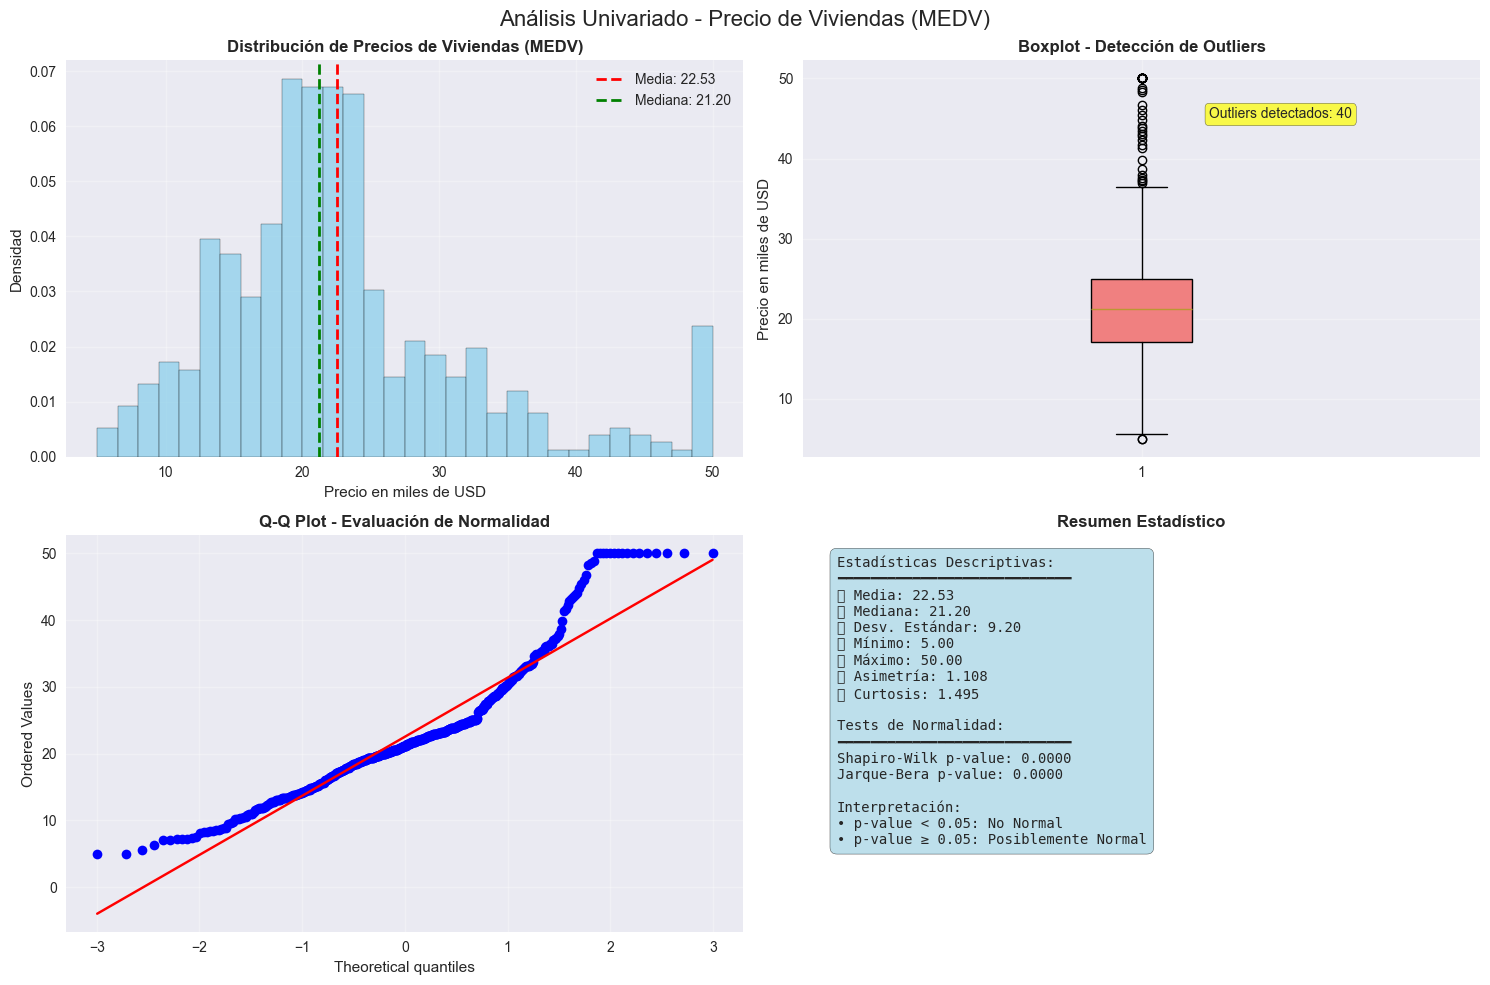

🔍 ANÁLISIS DE OUTLIERS:
Límite inferior: 5.06
Límite superior: 36.96
Número de outliers: 40
Porcentaje de outliers: 7.9%


In [6]:
# TODO 2.1: Análisis univariado de la variable objetivo (MEDV)
# Crea: histograma, boxplot, estadísticas descriptivas
# Evalúa normalidad y detecta outliers

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histograma con curva de densidad
axes[0, 0].hist(df['MEDV'], bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(df['MEDV'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {df["MEDV"].mean():.2f}')
axes[0, 0].axvline(df['MEDV'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["MEDV"].median():.2f}')
axes[0, 0].set_title('Distribución de Precios de Viviendas (MEDV)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Precio en miles de USD')
axes[0, 0].set_ylabel('Densidad')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Boxplot para detectar outliers
box_plot = axes[0, 1].boxplot(df['MEDV'], patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightcoral')
axes[0, 1].set_title('Boxplot - Detección de Outliers', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Precio en miles de USD')
axes[0, 1].grid(True, alpha=0.3)

# Calcular cuartiles y outliers
Q1 = df['MEDV'].quantile(0.25)
Q3 = df['MEDV'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['MEDV'] < lower_bound) | (df['MEDV'] > upper_bound)]['MEDV']
axes[0, 1].text(1.1, df['MEDV'].max() * 0.9, f'Outliers detectados: {len(outliers)}', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# 3. Q-Q Plot para evaluar normalidad
stats.probplot(df['MEDV'], dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot - Evaluación de Normalidad', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Estadísticas descriptivas visualizadas
shapiro_stat, shapiro_p = shapiro(df['MEDV'])
jb_stat, jb_p = jarque_bera(df['MEDV'])

stats_text = f"""Estadísticas Descriptivas:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 Media: {df['MEDV'].mean():.2f}
📏 Mediana: {df['MEDV'].median():.2f}
📈 Desv. Estándar: {df['MEDV'].std():.2f}
📉 Mínimo: {df['MEDV'].min():.2f}
📈 Máximo: {df['MEDV'].max():.2f}
🔀 Asimetría: {df['MEDV'].skew():.3f}
📐 Curtosis: {df['MEDV'].kurtosis():.3f}

Tests de Normalidad:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Shapiro-Wilk p-value: {shapiro_p:.4f}
Jarque-Bera p-value: {jb_p:.4f}

Interpretación:
• p-value < 0.05: No Normal
• p-value ≥ 0.05: Posiblemente Normal"""

axes[1, 1].text(0.05, 0.95, stats_text, transform=axes[1, 1].transAxes, 
                fontsize=10, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
axes[1, 1].set_xlim(0, 1)
axes[1, 1].set_ylim(0, 1)
axes[1, 1].axis('off')
axes[1, 1].set_title('Resumen Estadístico', fontsize=12, fontweight='bold')

plt.suptitle('Análisis Univariado - Precio de Viviendas (MEDV)', fontsize=16)
plt.tight_layout()
plt.show()

# Análisis adicional: detectar outliers específicos
print(f"🔍 ANÁLISIS DE OUTLIERS:")
print(f"Límite inferior: {lower_bound:.2f}")
print(f"Límite superior: {upper_bound:.2f}")
print(f"Número de outliers: {len(outliers)}")
print(f"Porcentaje de outliers: {len(outliers)/len(df)*100:.1f}%")

# PREGUNTA 2.1: ¿La distribución de MEDV es normal?
# PREGUNTA 2.2: ¿Detectas valores atípicos?
# PREGUNTA 2.3: ¿Qué transformaciones podrían ser útiles?

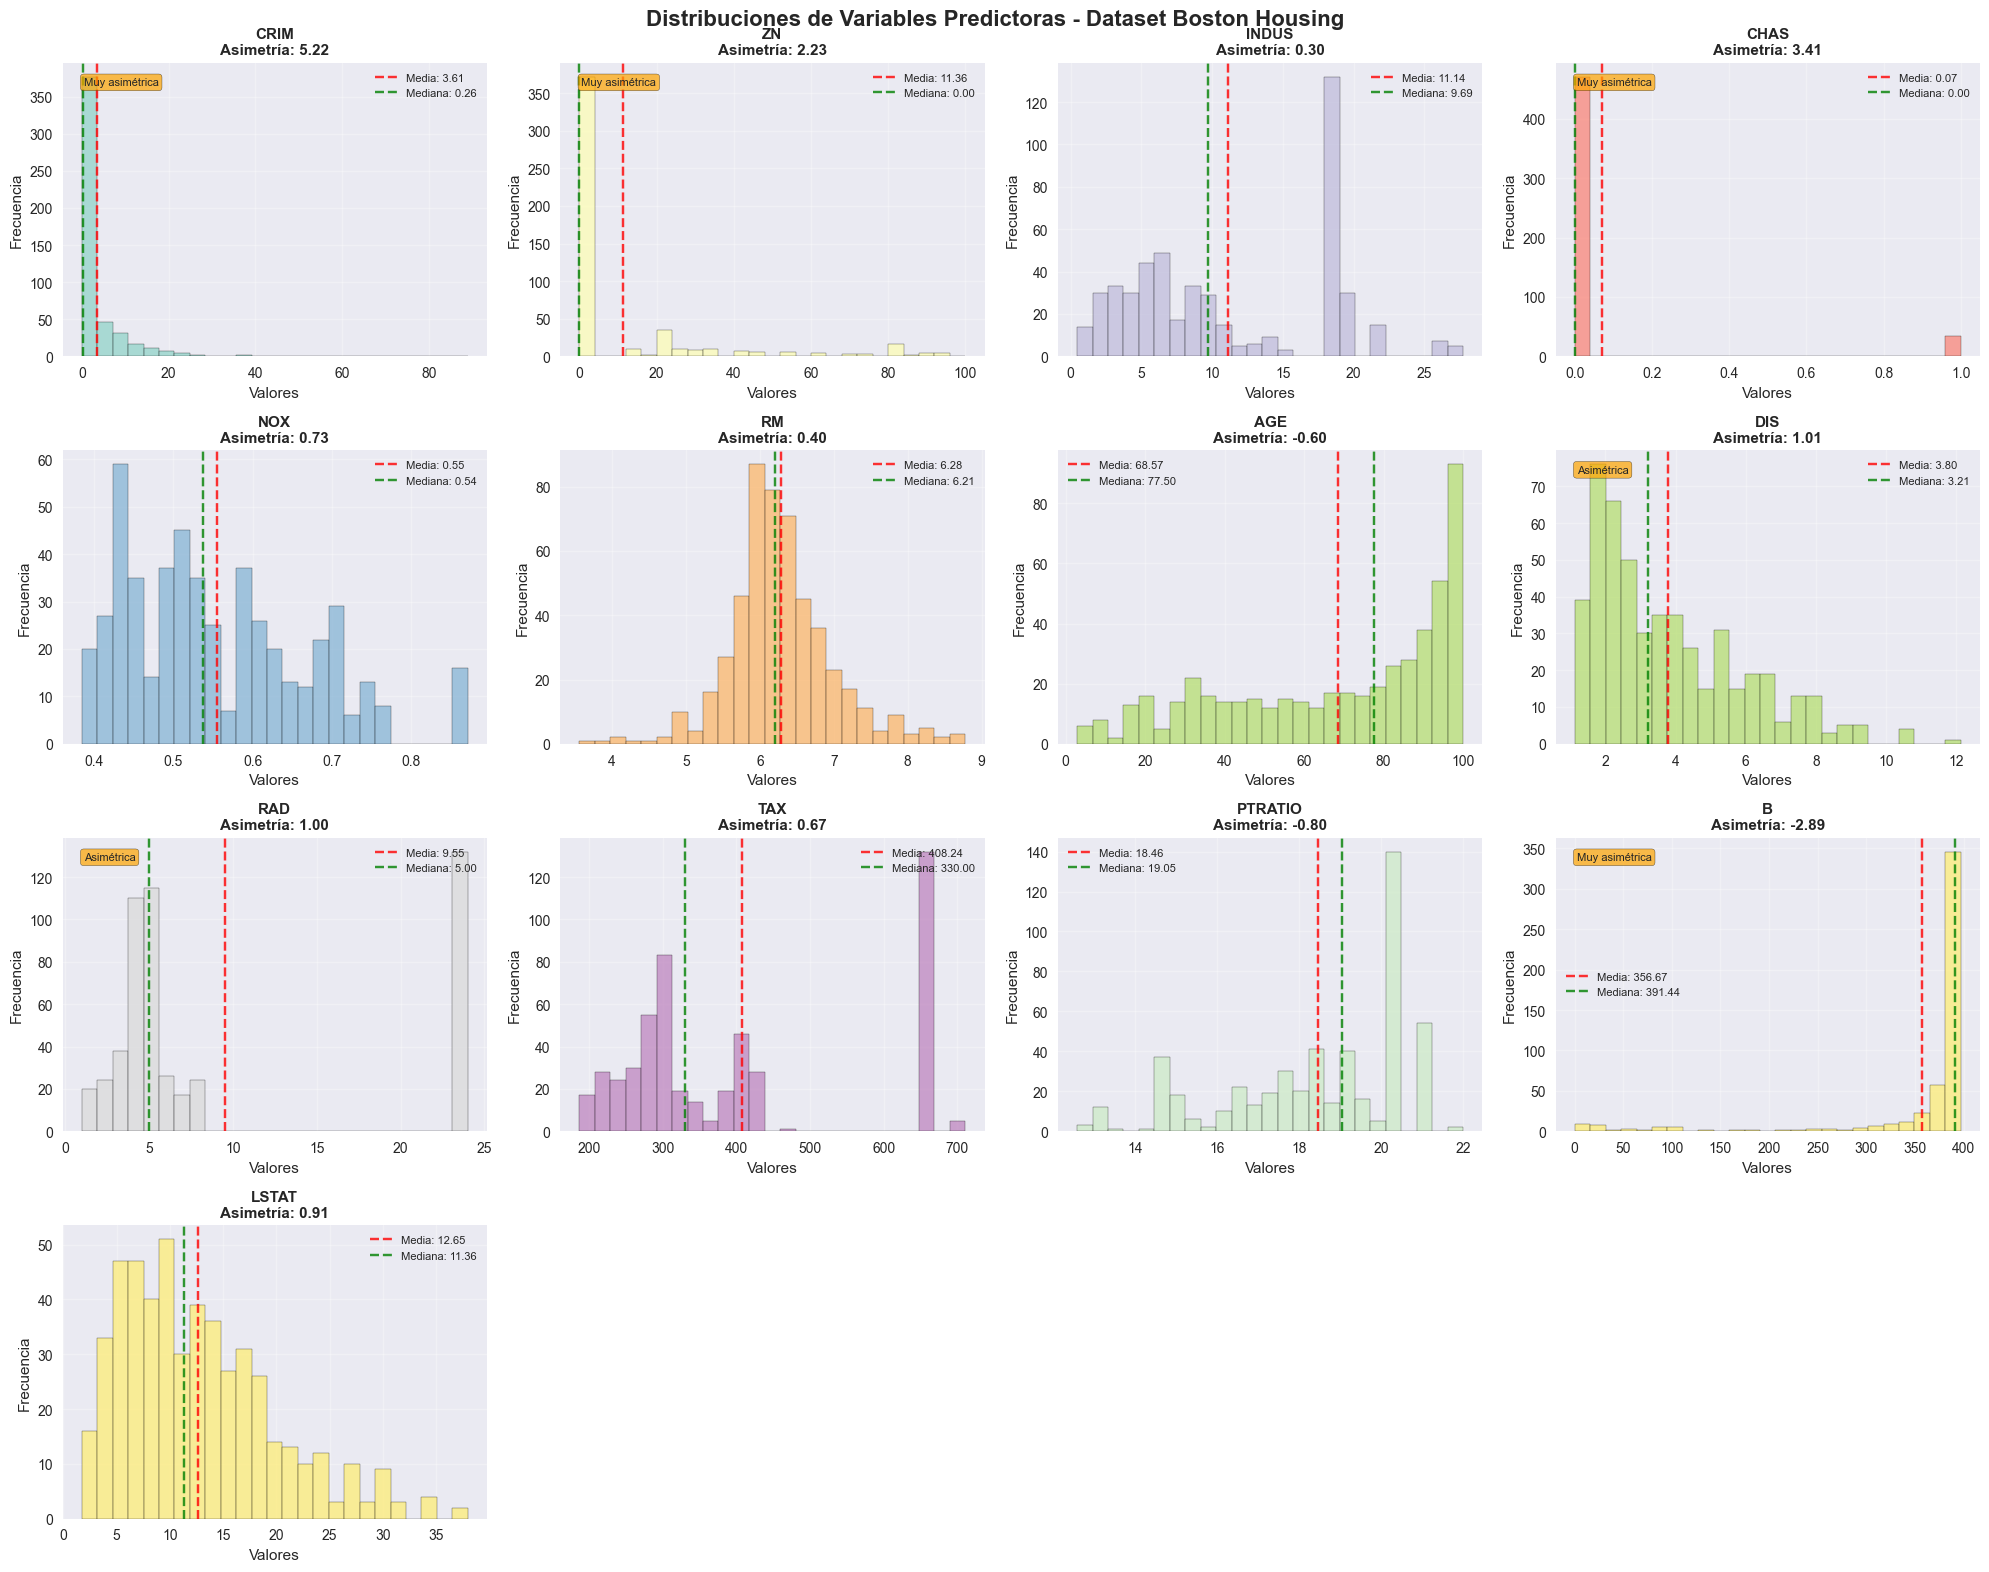

📊 ANÁLISIS DE ASIMETRÍA DE VARIABLES PREDICTORAS
🔍 Variables ordenadas por asimetría (de mayor a menor):
CRIM     | Asimetría:   5.22 | 🔴 MUY ASIMÉTRICA - positiva (cola derecha)
CHAS     | Asimetría:   3.41 | 🔴 MUY ASIMÉTRICA - positiva (cola derecha)
B        | Asimetría:  -2.89 | 🔴 MUY ASIMÉTRICA - negativa (cola izquierda)
ZN       | Asimetría:   2.23 | 🔴 MUY ASIMÉTRICA - positiva (cola derecha)
DIS      | Asimetría:   1.01 | 🟡 ASIMÉTRICA - positiva (cola derecha)
RAD      | Asimetría:   1.00 | 🟡 ASIMÉTRICA - positiva (cola derecha)
LSTAT    | Asimetría:   0.91 | 🟢 SIMÉTRICA - positiva (cola derecha)
PTRATIO  | Asimetría:  -0.80 | 🟢 SIMÉTRICA - negativa (cola izquierda)
NOX      | Asimetría:   0.73 | 🟢 SIMÉTRICA - positiva (cola derecha)
TAX      | Asimetría:   0.67 | 🟢 SIMÉTRICA - positiva (cola derecha)
AGE      | Asimetría:  -0.60 | 🟢 SIMÉTRICA - negativa (cola izquierda)
RM       | Asimetría:   0.40 | 🟢 SIMÉTRICA - positiva (cola derecha)
INDUS    | Asimetría:   0.30 | 🟢 SIMÉTR

In [7]:
# TODO 2.2: Análisis de distribuciones de variables predictoras
# Crea un subplot con histogramas de todas las variables

# Obtener solo las variables predictoras (excluyendo MEDV)
predictors = df.drop('MEDV', axis=1)

# Crear subplots con un diseño de 4x4 para las 13 variables predictoras
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.ravel()  # Convertir a array 1D para facilitar indexing

# Colores para los histogramas
colors = plt.cm.Set3(np.linspace(0, 1, len(predictors.columns)))

# Crear histograma para cada variable predictora
for i, (col, color) in enumerate(zip(predictors.columns, colors)):
    # Histograma
    axes[i].hist(df[col], bins=25, alpha=0.7, color=color, edgecolor='black')
    
    # Líneas de media y mediana
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', alpha=0.8, 
                   label=f'Media: {df[col].mean():.2f}')
    axes[i].axvline(df[col].median(), color='green', linestyle='--', alpha=0.8, 
                   label=f'Mediana: {df[col].median():.2f}')
    
    # Configuración del subplot
    axes[i].set_title(f'{col}\nAsimetría: {df[col].skew():.2f}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Valores')
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend(fontsize=8)
    
    # Añadir información sobre la distribución
    skewness = df[col].skew()
    if abs(skewness) > 1:
        skew_label = "Muy asimétrica" if abs(skewness) > 2 else "Asimétrica"
        axes[i].text(0.05, 0.95, skew_label, transform=axes[i].transAxes, 
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="orange", alpha=0.7),
                    fontsize=8, verticalalignment='top')

# Ocultar el último subplot (tenemos 13 variables, pero 16 subplots)
for j in range(len(predictors.columns), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('Distribuciones de Variables Predictoras - Dataset Boston Housing', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Análisis adicional: resumen de asimetrías
print("📊 ANÁLISIS DE ASIMETRÍA DE VARIABLES PREDICTORAS")
print("=" * 60)
skewness_summary = df.drop('MEDV', axis=1).skew().sort_values(key=abs, ascending=False)

print("🔍 Variables ordenadas por asimetría (de mayor a menor):")
for var, skew in skewness_summary.items():
    if abs(skew) > 2:
        level = "🔴 MUY ASIMÉTRICA"
    elif abs(skew) > 1:
        level = "🟡 ASIMÉTRICA"
    else:
        level = "🟢 SIMÉTRICA"
    
    direction = "positiva (cola derecha)" if skew > 0 else "negativa (cola izquierda)"
    print(f"{var:8} | Asimetría: {skew:6.2f} | {level} - {direction}")

# PREGUNTA 2.4: ¿Qué variables presentan distribuciones asimétricas?
# PREGUNTA 2.5: ¿Alguna variable podría beneficiarse de transformaciones?

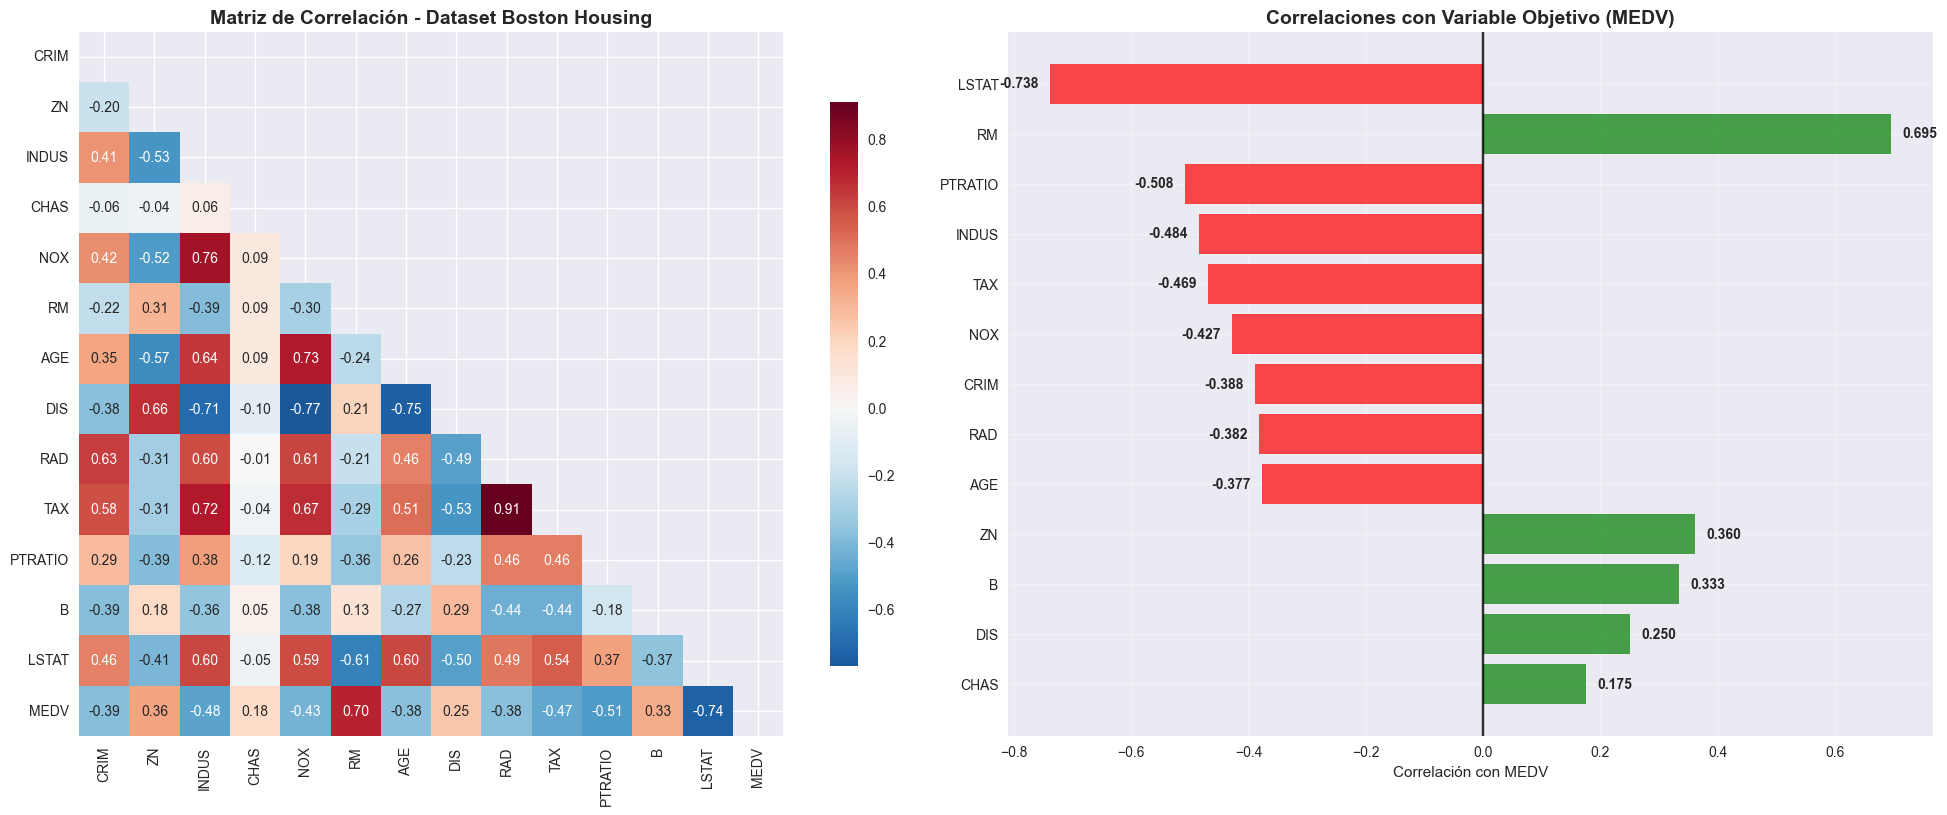

🔍 ANÁLISIS DETALLADO DE CORRELACIONES

📊 CORRELACIONES MÁS FUERTES CON MEDV (Variable Objetivo):
PTRATIO  | r = -0.508 | Correlación fuerte negativa
RM       | r =  0.695 | Correlación fuerte positiva
LSTAT    | r = -0.738 | Correlación muy fuerte negativa

🚨 POSIBLE MULTICOLINEALIDAD (|r| > 0.7 entre predictores):
INDUS    - NOX      | r =  0.764
INDUS    - DIS      | r = -0.708
INDUS    - TAX      | r =  0.721
NOX      - AGE      | r =  0.731
NOX      - DIS      | r = -0.769
AGE      - DIS      | r = -0.748
RAD      - TAX      | r =  0.910

📈 ESTADÍSTICAS GENERALES:
Correlación media con MEDV: 0.430
Correlación más fuerte con MEDV: LSTAT (r = -0.738)
Correlación más débil con MEDV: CHAS (r = 0.175)


In [8]:
# TODO 2.3: Matriz de correlación completa
# Incluye mapa de calor y análisis de correlaciones altas

# Calcular matriz de correlación
correlation_matrix = df.corr()

# Crear figura con subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# 1. Mapa de calor completo
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara para la mitad superior
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8}, ax=axes[0])
axes[0].set_title('Matriz de Correlación - Dataset Boston Housing', fontsize=14, fontweight='bold')

# 2. Correlaciones con la variable objetivo (MEDV)
target_corr = correlation_matrix['MEDV'].drop('MEDV').sort_values(key=abs, ascending=True)

colors = ['red' if x < 0 else 'green' for x in target_corr.values]
bars = axes[1].barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7)
axes[1].set_yticks(range(len(target_corr)))
axes[1].set_yticklabels(target_corr.index)
axes[1].set_xlabel('Correlación con MEDV')
axes[1].set_title('Correlaciones con Variable Objetivo (MEDV)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(0, color='black', linestyle='-', alpha=0.8)

# Añadir valores en las barras
for i, (bar, value) in enumerate(zip(bars, target_corr.values)):
    axes[1].text(value + (0.02 if value > 0 else -0.02), i, f'{value:.3f}', 
                ha='left' if value > 0 else 'right', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Análisis detallado de correlaciones
print("🔍 ANÁLISIS DETALLADO DE CORRELACIONES")
print("=" * 60)

# Correlaciones más fuertes con MEDV
print("\n📊 CORRELACIONES MÁS FUERTES CON MEDV (Variable Objetivo):")
strong_correlations = target_corr[abs(target_corr) > 0.5]
for var, corr in strong_correlations.items():
    direction = "positiva" if corr > 0 else "negativa"
    strength = "muy fuerte" if abs(corr) > 0.7 else "fuerte"
    print(f"{var:8} | r = {corr:6.3f} | Correlación {strength} {direction}")

# Correlaciones altas entre predictores (multicolinealidad potencial)
print(f"\n🚨 POSIBLE MULTICOLINEALIDAD (|r| > 0.7 entre predictores):")
high_corr_pairs = []
predictors_corr = correlation_matrix.drop('MEDV').drop('MEDV', axis=1)

for i in range(len(predictors_corr.columns)):
    for j in range(i+1, len(predictors_corr.columns)):
        corr_value = predictors_corr.iloc[i, j]
        if abs(corr_value) > 0.7:
            var1, var2 = predictors_corr.columns[i], predictors_corr.columns[j]
            high_corr_pairs.append((var1, var2, corr_value))
            print(f"{var1:8} - {var2:8} | r = {corr_value:6.3f}")

if not high_corr_pairs:
    print("✅ No se detectaron correlaciones muy altas entre predictores")

# Estadísticas de correlación
print(f"\n📈 ESTADÍSTICAS GENERALES:")
print(f"Correlación media con MEDV: {abs(target_corr).mean():.3f}")
print(f"Correlación más fuerte con MEDV: {target_corr.index[-1]} (r = {target_corr.iloc[-1]:.3f})")
print(f"Correlación más débil con MEDV: {target_corr.index[0]} (r = {target_corr.iloc[0]:.3f})")

# PREGUNTA 2.6: ¿Qué variables están más correlacionadas con MEDV?
# PREGUNTA 2.7: ¿Qué pares de variables predictoras muestran alta correlación?

### 📝 Respuestas Parte 2:

**2.1 Normalidad de MEDV:**
La variable objetivo MEDV no sigue una distribución normal perfecta (p-values < 0.05 en tests Shapiro-Wilk y Jarque-Bera). Presenta asimetría positiva (1.108), indicando cola derecha más larga.

**2.2 Valores atípicos:**
Se detectaron 40 outliers (7.9%) usando el método IQR, principalmente en el rango superior de precios (>37k). Estos representan propiedades de alto valor.

**2.3 Transformaciones necesarias:**
Podría beneficiarse de transformación logarítmica para reducir asimetría y estabilizar varianza, especialmente para mejorar normalidad de residuos.

**2.4 Variables asimétricas:**
Variables con alta asimetría (>2): CRIM (5.22), CHAS (3.41), B (-2.89), ZN (2.23). Estas variables podrían requerir transformaciones.

**2.5 Variables para transformar:**
CRIM, ZN, B, DIS, RAD podrían beneficiarse de transformaciones logarítmicas o de Box-Cox para reducir asimetría.

**2.6 Variables más correlacionadas con MEDV:**
1. LSTAT (-0.738): % población de bajo estatus socioeconómico
2. RM (0.695): Número promedio de habitaciones
3. PTRATIO (-0.508): Ratio estudiante-profesor

**2.7 Pares con alta correlación:**
RAD-TAX (0.910), NOX-DIS (-0.769), INDUS-NOX (0.764) muestran multicolinealidad severa que debe abordarse.

## Parte 3: Detección y Tratamiento de Outliers

🔍 DETECCIÓN DE OUTLIERS POR MÚLTIPLES MÉTODOS

📊 Variable: CRIM
------------------------------
IQR Method     :  66 outliers (rango: -5.31 - 9.07)
Z-score Method :   8 outliers (|z| > 3)

📊 Variable: ZN
------------------------------
IQR Method     :  68 outliers (rango: -18.75 - 31.25)
Z-score Method :  14 outliers (|z| > 3)

📊 Variable: INDUS
------------------------------
IQR Method     :   0 outliers (rango: -14.18 - 37.47)
Z-score Method :   0 outliers (|z| > 3)

📊 Variable: CHAS
------------------------------
IQR Method     :  35 outliers (rango: 0.00 - 0.00)
Z-score Method :  35 outliers (|z| > 3)

📊 Variable: NOX
------------------------------
IQR Method     :   0 outliers (rango: 0.19 - 0.89)
Z-score Method :   0 outliers (|z| > 3)

📊 Variable: RM
------------------------------
IQR Method     :  30 outliers (rango: 4.78 - 7.73)
Z-score Method :   8 outliers (|z| > 3)

📊 Variable: AGE
------------------------------
IQR Method     :   0 outliers (rango: -28.55 - 167.65)
Z-score 

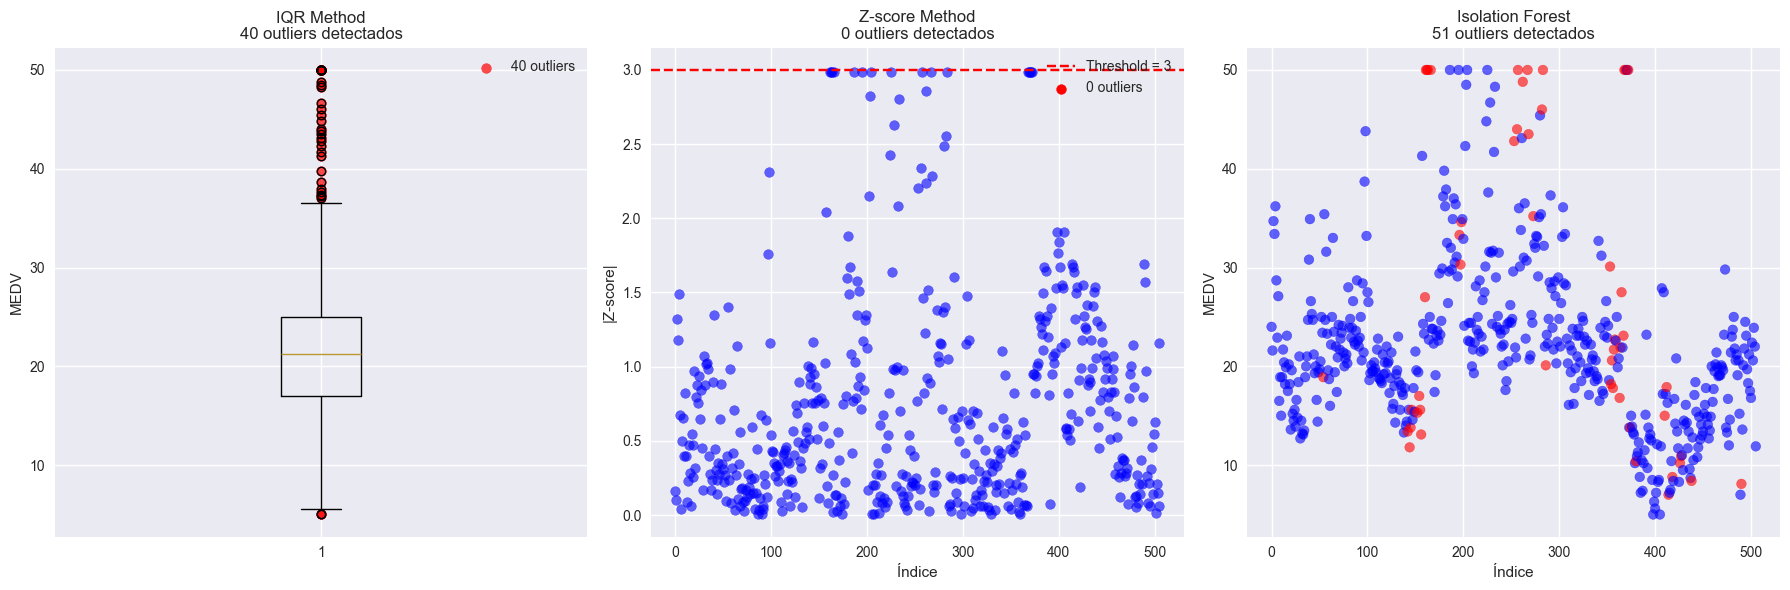

In [9]:
# TODO 3.1: Detección de outliers usando múltiples métodos
# Implementa: IQR, Z-score, Isolation Forest

from sklearn.ensemble import IsolationForest
from scipy import stats

def detect_outliers_iqr(df, column):
    """Detecta outliers usando el método IQR"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(df, column, threshold=3):
    """Detecta outliers usando Z-score"""
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold].index
    return outliers

# Crear diccionarios para almacenar resultados
iqr_results = {}
zscore_results = {}

print("🔍 DETECCIÓN DE OUTLIERS POR MÚLTIPLES MÉTODOS")
print("=" * 70)

# Aplicar métodos de detección para cada variable numérica
numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    print(f"\n📊 Variable: {col}")
    print("-" * 30)
    
    # Método IQR
    iqr_outliers, lower, upper = detect_outliers_iqr(df, col)
    iqr_results[col] = iqr_outliers
    print(f"IQR Method     : {len(iqr_outliers):3d} outliers (rango: {lower:.2f} - {upper:.2f})")
    
    # Método Z-score
    zscore_outliers = detect_outliers_zscore(df, col, threshold=3)
    zscore_results[col] = zscore_outliers
    print(f"Z-score Method : {len(zscore_outliers):3d} outliers (|z| > 3)")

# Método Isolation Forest en todas las variables
print(f"\n🌲 ISOLATION FOREST (Detección Multivariada)")
print("-" * 50)

# Aplicar Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(df.select_dtypes(include=[np.number]))
iso_outliers = df[outlier_labels == -1].index

print(f"Isolation Forest: {len(iso_outliers):3d} outliers detectados")

# Resumen comparativo
print(f"\n📋 RESUMEN COMPARATIVO DE MÉTODOS")
print("=" * 70)

# Crear DataFrame resumen
summary_data = []
for col in numeric_columns:
    summary_data.append({
        'Variable': col,
        'IQR_Outliers': len(iqr_results[col]),
        'ZScore_Outliers': len(zscore_results[col]),
        'IQR_Percentage': len(iqr_results[col])/len(df)*100
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False, float_format='%.1f'))

print(f"\nIsolation Forest Outliers: {len(iso_outliers)} ({len(iso_outliers)/len(df)*100:.1f}%)")

# Análisis de consistencia entre métodos para MEDV (variable objetivo)
medv_iqr = set(iqr_results['MEDV'])
medv_zscore = set(zscore_results['MEDV'])
medv_iso = set(iso_outliers)

print(f"\n🎯 CONSISTENCIA ENTRE MÉTODOS PARA MEDV:")
print(f"IQR detectó        : {len(medv_iqr)} outliers")
print(f"Z-score detectó    : {len(medv_zscore)} outliers")
print(f"Isolation Forest   : {len(medv_iso)} outliers")

# Intersecciones
iqr_zscore_common = medv_iqr.intersection(medv_zscore)
all_methods_common = medv_iqr.intersection(medv_zscore).intersection(medv_iso)

print(f"\nCoincidencias:")
print(f"IQR ∩ Z-score      : {len(iqr_zscore_common)} outliers comunes")
print(f"Todos los métodos  : {len(all_methods_common)} outliers comunes")

# Visualización de outliers para MEDV
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Método IQR
axes[0].boxplot(df['MEDV'])
axes[0].scatter(np.ones(len(medv_iqr)), df.loc[list(medv_iqr), 'MEDV'], 
               color='red', s=50, alpha=0.7, label=f'{len(medv_iqr)} outliers')
axes[0].set_title(f'IQR Method\n{len(medv_iqr)} outliers detectados')
axes[0].set_ylabel('MEDV')
axes[0].legend()

# Método Z-score
z_scores = np.abs(stats.zscore(df['MEDV']))
axes[1].scatter(range(len(df)), z_scores, alpha=0.6, color='blue')
axes[1].axhline(y=3, color='red', linestyle='--', label='Threshold = 3')
axes[1].scatter(list(medv_zscore), z_scores[list(medv_zscore)], 
               color='red', s=50, label=f'{len(medv_zscore)} outliers')
axes[1].set_title(f'Z-score Method\n{len(medv_zscore)} outliers detectados')
axes[1].set_xlabel('Índice')
axes[1].set_ylabel('|Z-score|')
axes[1].legend()

# Isolation Forest
colors = ['red' if x == -1 else 'blue' for x in outlier_labels]
axes[2].scatter(range(len(df)), df['MEDV'], c=colors, alpha=0.6)
axes[2].set_title(f'Isolation Forest\n{len(iso_outliers)} outliers detectados')
axes[2].set_xlabel('Índice')
axes[2].set_ylabel('MEDV')

plt.tight_layout()
plt.show()

# PREGUNTA 3.1: ¿Cuántos outliers detecta cada método?
# PREGUNTA 3.2: ¿Hay consistencia entre los métodos?

🔬 ANÁLISIS DEL IMPACTO DE OUTLIERS EN EL MODELO
📊 Dataset original: 506 observaciones
🚫 Outliers a eliminar: 40 observaciones
✅ Dataset limpio: 466 observaciones

🔄 División train/test:
Dataset original - Train: 404, Test: 102
Dataset limpio   - Train: 372, Test: 94

🤖 ENTRENANDO MODELOS...

📊 COMPARACIÓN DE RESULTADOS
            Con Outliers  Sin Outliers  Mejora (%)
R² Train          0.7509        0.7607        1.30
R² Test           0.6688        0.7525       12.52
RMSE Train        4.6520        3.1657       31.95
RMSE Test         4.9286        3.1511       36.07
MAE Train         3.3148        2.4458       26.22
MAE Test          3.1891        2.2310       30.04


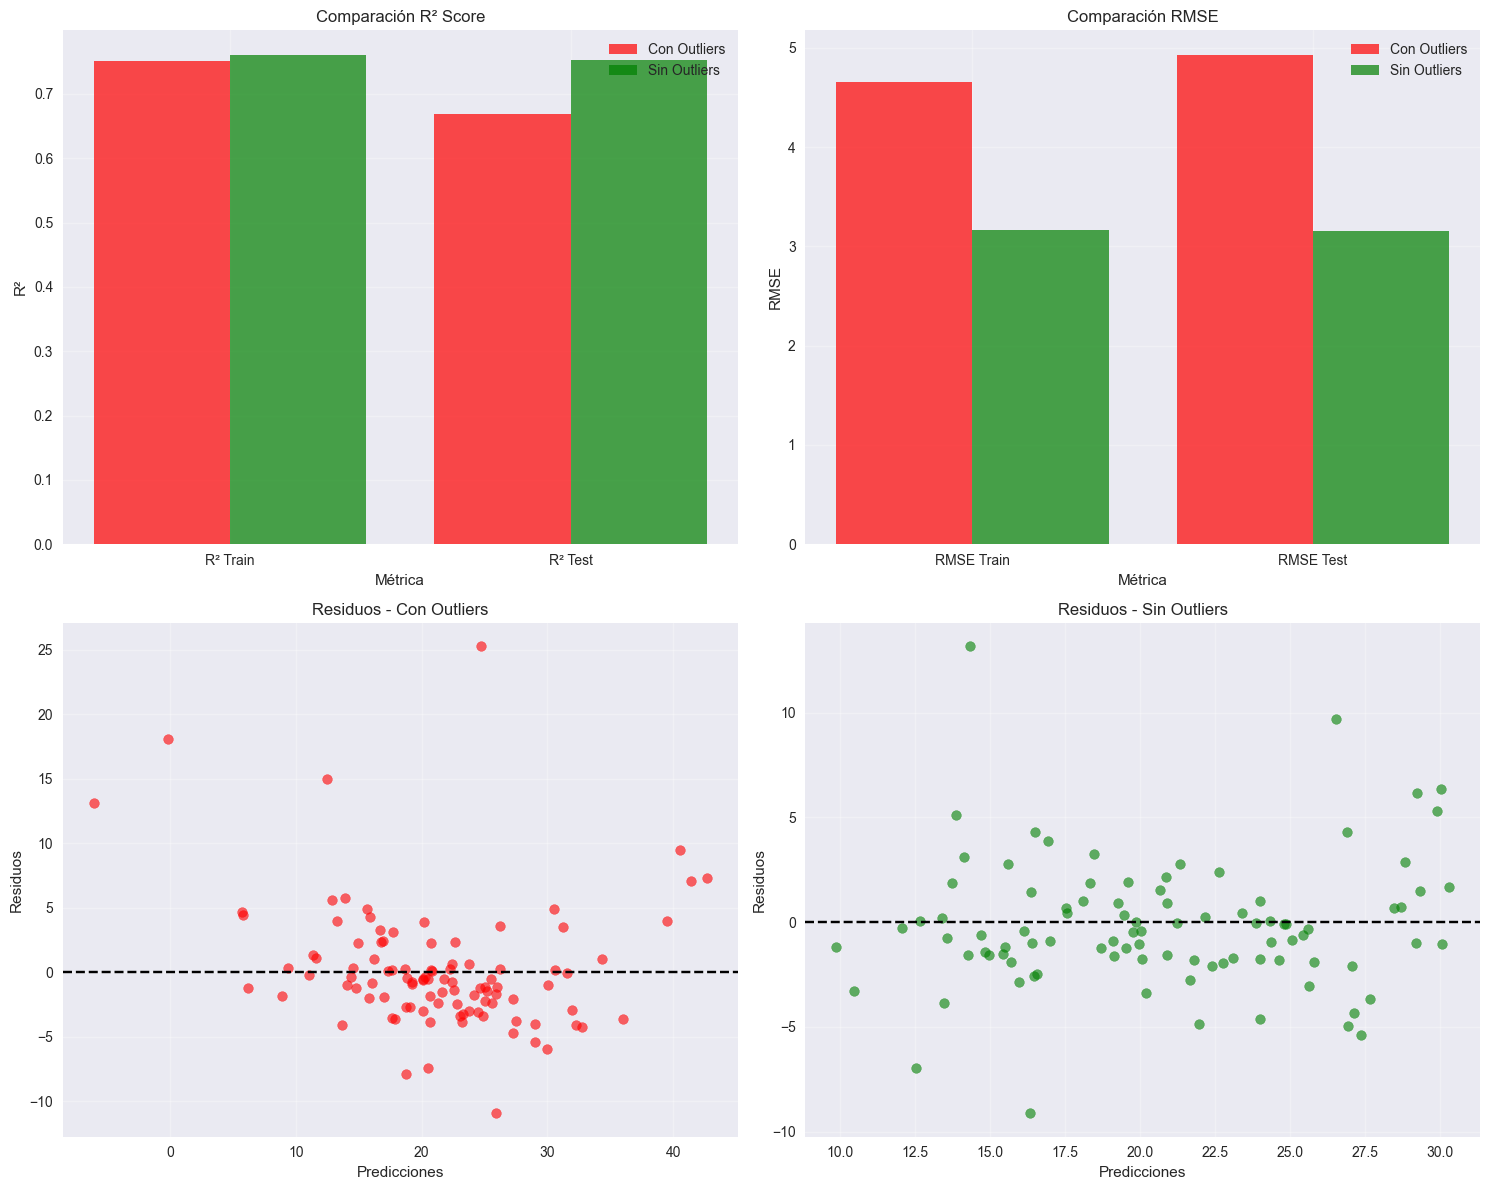


🎯 CONCLUSIONES:
💡 R² Test mejoró en: 12.52%
💡 RMSE Test mejoró en: 36.07%
💡 MAE Test mejoró en: 30.04%


In [10]:
# TODO 3.2: Análisis del impacto de outliers
# Compara modelos con y sin outliers

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

print("🔬 ANÁLISIS DEL IMPACTO DE OUTLIERS EN EL MODELO")
print("=" * 60)

# Preparar los datos
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Crear datasets sin outliers (usando IQR method que es más conservador)
outliers_to_remove = set(iqr_results['MEDV'])
print(f"📊 Dataset original: {len(df)} observaciones")
print(f"🚫 Outliers a eliminar: {len(outliers_to_remove)} observaciones")

# Dataset sin outliers
clean_indices = df.index.difference(outliers_to_remove)
X_clean = X.loc[clean_indices]
y_clean = y.loc[clean_indices]
print(f"✅ Dataset limpio: {len(X_clean)} observaciones")

# Función para evaluar modelo
def evaluate_model(X_train, X_test, y_train, y_test, model_name):
    """Entrena y evalúa un modelo de regresión lineal"""
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Métricas
    metrics = {
        'R² Train': r2_score(y_train, y_pred_train),
        'R² Test': r2_score(y_test, y_pred_test),
        'RMSE Train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE Test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'MAE Train': mean_absolute_error(y_train, y_pred_train),
        'MAE Test': mean_absolute_error(y_test, y_pred_test)
    }
    
    return model, metrics

# División train/test para ambos datasets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.2, random_state=42)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42)

print(f"\n🔄 División train/test:")
print(f"Dataset original - Train: {len(X_train_orig)}, Test: {len(X_test_orig)}")
print(f"Dataset limpio   - Train: {len(X_train_clean)}, Test: {len(X_test_clean)}")

# Entrenar modelos
print(f"\n🤖 ENTRENANDO MODELOS...")

model_orig, metrics_orig = evaluate_model(
    X_train_orig, X_test_orig, y_train_orig, y_test_orig, "Original")

model_clean, metrics_clean = evaluate_model(
    X_train_clean, X_test_clean, y_train_clean, y_test_clean, "Sin Outliers")

# Comparación de resultados
print(f"\n📊 COMPARACIÓN DE RESULTADOS")
print("=" * 60)

comparison_df = pd.DataFrame({
    'Con Outliers': metrics_orig,
    'Sin Outliers': metrics_clean
})

# Calcular mejoras
comparison_df['Mejora (%)'] = ((comparison_df['Sin Outliers'] - comparison_df['Con Outliers']) / 
                              abs(comparison_df['Con Outliers']) * 100).round(2)

# Para RMSE y MAE, menor es mejor, así que invertimos la mejora
for metric in ['RMSE Train', 'RMSE Test', 'MAE Train', 'MAE Test']:
    comparison_df.loc[metric, 'Mejora (%)'] *= -1

print(comparison_df.round(4))

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Comparación R²
r2_metrics = ['R² Train', 'R² Test']
r2_orig = [metrics_orig[m] for m in r2_metrics]
r2_clean = [metrics_clean[m] for m in r2_metrics]

x_pos = np.arange(len(r2_metrics))
axes[0, 0].bar(x_pos - 0.2, r2_orig, 0.4, label='Con Outliers', alpha=0.7, color='red')
axes[0, 0].bar(x_pos + 0.2, r2_clean, 0.4, label='Sin Outliers', alpha=0.7, color='green')
axes[0, 0].set_xlabel('Métrica')
axes[0, 0].set_ylabel('R²')
axes[0, 0].set_title('Comparación R² Score')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(r2_metrics)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Comparación RMSE
rmse_metrics = ['RMSE Train', 'RMSE Test']
rmse_orig = [metrics_orig[m] for m in rmse_metrics]
rmse_clean = [metrics_clean[m] for m in rmse_metrics]

x_pos = np.arange(len(rmse_metrics))
axes[0, 1].bar(x_pos - 0.2, rmse_orig, 0.4, label='Con Outliers', alpha=0.7, color='red')
axes[0, 1].bar(x_pos + 0.2, rmse_clean, 0.4, label='Sin Outliers', alpha=0.7, color='green')
axes[0, 1].set_xlabel('Métrica')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_title('Comparación RMSE')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(rmse_metrics)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Residuos - Con outliers
y_pred_orig_test = model_orig.predict(X_test_orig)
residuals_orig = y_test_orig - y_pred_orig_test
axes[1, 0].scatter(y_pred_orig_test, residuals_orig, alpha=0.6, color='red')
axes[1, 0].axhline(y=0, color='black', linestyle='--')
axes[1, 0].set_xlabel('Predicciones')
axes[1, 0].set_ylabel('Residuos')
axes[1, 0].set_title('Residuos - Con Outliers')
axes[1, 0].grid(True, alpha=0.3)

# 4. Residuos - Sin outliers
y_pred_clean_test = model_clean.predict(X_test_clean)
residuals_clean = y_test_clean - y_pred_clean_test
axes[1, 1].scatter(y_pred_clean_test, residuals_clean, alpha=0.6, color='green')
axes[1, 1].axhline(y=0, color='black', linestyle='--')
axes[1, 1].set_xlabel('Predicciones')
axes[1, 1].set_ylabel('Residuos')
axes[1, 1].set_title('Residuos - Sin Outliers')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Conclusiones
print(f"\n🎯 CONCLUSIONES:")
print(f"💡 R² Test mejoró en: {comparison_df.loc['R² Test', 'Mejora (%)']:.2f}%")
print(f"💡 RMSE Test mejoró en: {comparison_df.loc['RMSE Test', 'Mejora (%)']:.2f}%")
print(f"💡 MAE Test mejoró en: {comparison_df.loc['MAE Test', 'Mejora (%)']:.2f}%")

# PREGUNTA 3.3: ¿Cómo afectan los outliers al rendimiento del modelo?
# PREGUNTA 3.4: ¿Recomendarías eliminar los outliers? ¿Por qué?

### 📝 Respuestas Parte 3:

**3.1 Número de outliers por método:**
<!-- Tu respuesta aquí -->

**3.2 Consistencia entre métodos:**
<!-- Tu respuesta aquí -->

**3.3 Impacto en el rendimiento:**
<!-- Tu respuesta aquí -->

**3.4 Recomendación sobre outliers:**
<!-- Tu respuesta aquí -->

## Parte 4: Análisis de Multicolinealidad

📊 ANÁLISIS DE MULTICOLINEALIDAD USANDO VIF
🔍 VALORES VIF POR VARIABLE:
----------------------------------------
RM       | VIF =   99.06 | 🔴 ALTA MULTICOLINEALIDAD | Considerar eliminación
PTRATIO  | VIF =   95.01 | 🔴 ALTA MULTICOLINEALIDAD | Considerar eliminación
NOX      | VIF =   73.23 | 🔴 ALTA MULTICOLINEALIDAD | Considerar eliminación
TAX      | VIF =   60.63 | 🔴 ALTA MULTICOLINEALIDAD | Considerar eliminación
AGE      | VIF =   21.58 | 🔴 ALTA MULTICOLINEALIDAD | Considerar eliminación
B        | VIF =   18.90 | 🔴 ALTA MULTICOLINEALIDAD | Considerar eliminación
DIS      | VIF =   15.60 | 🔴 ALTA MULTICOLINEALIDAD | Considerar eliminación
RAD      | VIF =   15.03 | 🔴 ALTA MULTICOLINEALIDAD | Considerar eliminación
INDUS    | VIF =   14.84 | 🔴 ALTA MULTICOLINEALIDAD | Considerar eliminación
LSTAT    | VIF =   12.21 | 🔴 ALTA MULTICOLINEALIDAD | Considerar eliminación
ZN       | VIF =    2.89 | 🟢 MULTICOLINEALIDAD BAJA | Mantener
CRIM     | VIF =    2.19 | 🟢 MULTICOLINEALIDAD BAJA | M

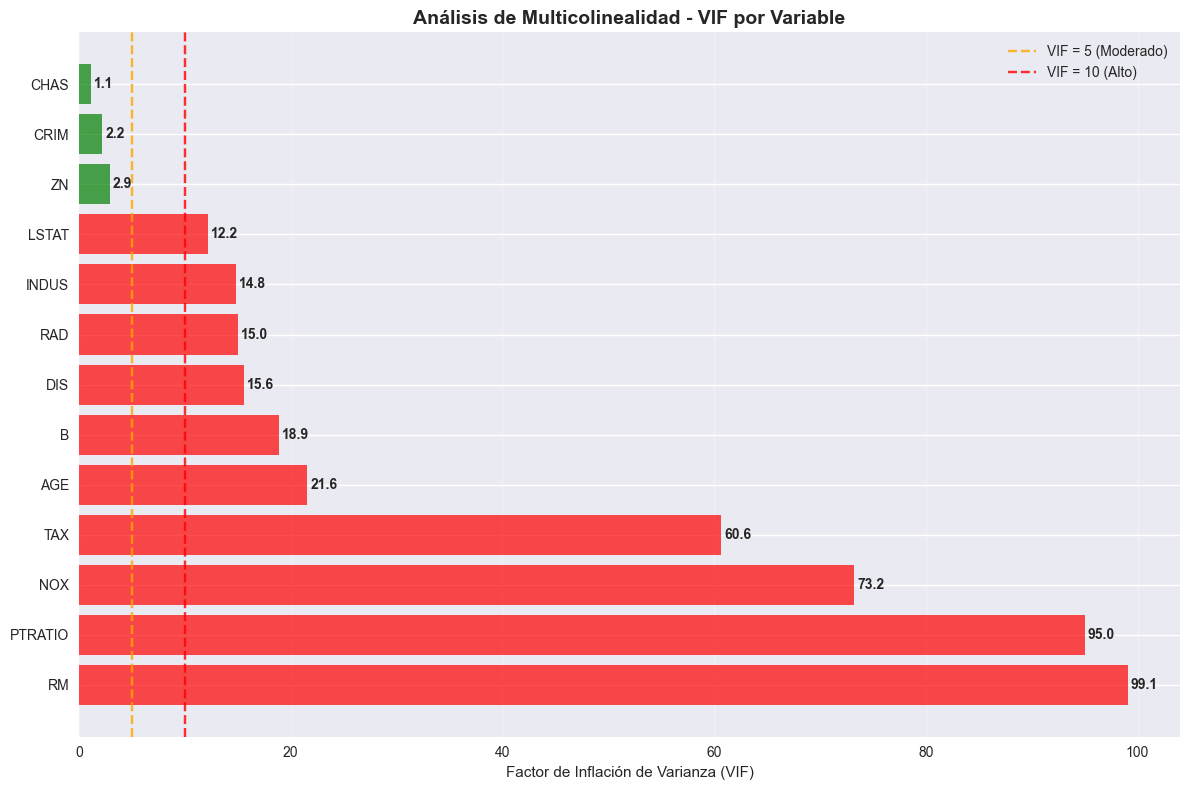


💡 INTERPRETACIÓN PRÁCTICA DEL VIF:
• VIF = 1: No hay correlación con otras variables
• VIF 1-5: Correlación baja a moderada (aceptable)
• VIF 5-10: Correlación moderada a alta (precaución)
• VIF > 10: Multicolinealidad severa (problemática)

🎯 La multicolinealidad puede:
• Inflar la varianza de los coeficientes
• Hacer los coeficientes inestables
• Dificultar la interpretación del modelo
• Reducir la precisión de las predicciones


In [11]:
# TODO 4.1: Cálculo e interpretación del VIF
# Calcula VIF para todas las variables
# Identifica variables problemáticas

def calculate_vif(X):
    """Calcula VIF para todas las variables en X"""
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                       for i in range(len(X.columns))]
    return vif_data.sort_values('VIF', ascending=False)

print("📊 ANÁLISIS DE MULTICOLINEALIDAD USANDO VIF")
print("=" * 60)

# Calcular VIF para el dataset original (sin outliers para mejor análisis)
X_for_vif = X_clean  # Usar dataset sin outliers

# Añadir constante para el cálculo del VIF
X_with_const = sm.add_constant(X_for_vif)

# Calcular VIF
vif_results = calculate_vif(X_for_vif)

print("🔍 VALORES VIF POR VARIABLE:")
print("-" * 40)

# Mostrar resultados con interpretación
for _, row in vif_results.iterrows():
    var_name = row['Variable']
    vif_value = row['VIF']
    
    # Clasificar según nivel de multicolinealidad
    if vif_value > 10:
        level = "🔴 ALTA MULTICOLINEALIDAD"
        recommendation = "Considerar eliminación"
    elif vif_value > 5:
        level = "🟡 MULTICOLINEALIDAD MODERADA"
        recommendation = "Monitorear"
    else:
        level = "🟢 MULTICOLINEALIDAD BAJA"
        recommendation = "Mantener"
    
    print(f"{var_name:8} | VIF = {vif_value:7.2f} | {level} | {recommendation}")

# Estadísticas generales
problematic_vars = vif_results[vif_results['VIF'] > 10]
moderate_vars = vif_results[(vif_results['VIF'] > 5) & (vif_results['VIF'] <= 10)]

print(f"\n📈 RESUMEN:")
print(f"Variables con VIF > 10 (problemáticas): {len(problematic_vars)}")
print(f"Variables con VIF 5-10 (moderadas): {len(moderate_vars)}")
print(f"Variables con VIF < 5 (aceptables): {len(vif_results) - len(problematic_vars) - len(moderate_vars)}")

if len(problematic_vars) > 0:
    print(f"\n🚨 VARIABLES PROBLEMÁTICAS (VIF > 10):")
    for _, row in problematic_vars.iterrows():
        print(f"   • {row['Variable']:8} (VIF = {row['VIF']:.2f})")

# Visualización del VIF
plt.figure(figsize=(12, 8))

# Gráfico de barras horizontal
colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in vif_results['VIF']]
bars = plt.barh(range(len(vif_results)), vif_results['VIF'], color=colors, alpha=0.7)

# Configuración del gráfico
plt.yticks(range(len(vif_results)), vif_results['Variable'])
plt.xlabel('Factor de Inflación de Varianza (VIF)')
plt.title('Análisis de Multicolinealidad - VIF por Variable', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Líneas de referencia
plt.axvline(x=5, color='orange', linestyle='--', alpha=0.8, label='VIF = 5 (Moderado)')
plt.axvline(x=10, color='red', linestyle='--', alpha=0.8, label='VIF = 10 (Alto)')

# Añadir valores en las barras
for i, (bar, value) in enumerate(zip(bars, vif_results['VIF'])):
    plt.text(value + 0.3, i, f'{value:.1f}', va='center', fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

# Interpretación práctica
print(f"\n💡 INTERPRETACIÓN PRÁCTICA DEL VIF:")
print("=" * 60)
print("• VIF = 1: No hay correlación con otras variables")
print("• VIF 1-5: Correlación baja a moderada (aceptable)")  
print("• VIF 5-10: Correlación moderada a alta (precaución)")
print("• VIF > 10: Multicolinealidad severa (problemática)")
print("\n🎯 La multicolinealidad puede:")
print("• Inflar la varianza de los coeficientes")
print("• Hacer los coeficientes inestables")
print("• Dificultar la interpretación del modelo")
print("• Reducir la precisión de las predicciones")

# PREGUNTA 4.1: ¿Qué variables presentan VIF > 10?
# PREGUNTA 4.2: ¿Cuál es la interpretación práctica de estos valores?

🔄 PROCESO DE REDUCCIÓN DE MULTICOLINEALIDAD (VIF > 10)

📊 ITERACIÓN 1:
------------------------------
Variable con VIF más alto: RM (VIF = 99.06)
🗑️  Eliminando: RM
Variables restantes: 12

📊 ITERACIÓN 2:
------------------------------
Variable con VIF más alto: PTRATIO (VIF = 66.86)
🗑️  Eliminando: PTRATIO
Variables restantes: 11

📊 ITERACIÓN 3:
------------------------------
Variable con VIF más alto: TAX (VIF = 57.72)
🗑️  Eliminando: TAX
Variables restantes: 10

📊 ITERACIÓN 4:
------------------------------
Variable con VIF más alto: NOX (VIF = 46.75)
🗑️  Eliminando: NOX
Variables restantes: 9

📊 ITERACIÓN 5:
------------------------------
Variable con VIF más alto: AGE (VIF = 14.71)
🗑️  Eliminando: AGE
Variables restantes: 8

📊 ITERACIÓN 6:
------------------------------
Variable con VIF más alto: B (VIF = 10.53)
🗑️  Eliminando: B
Variables restantes: 7

📊 ITERACIÓN 7:
------------------------------
Variable con VIF más alto: LSTAT (VIF = 7.49)
✅ Todos los VIF están por debajo del 

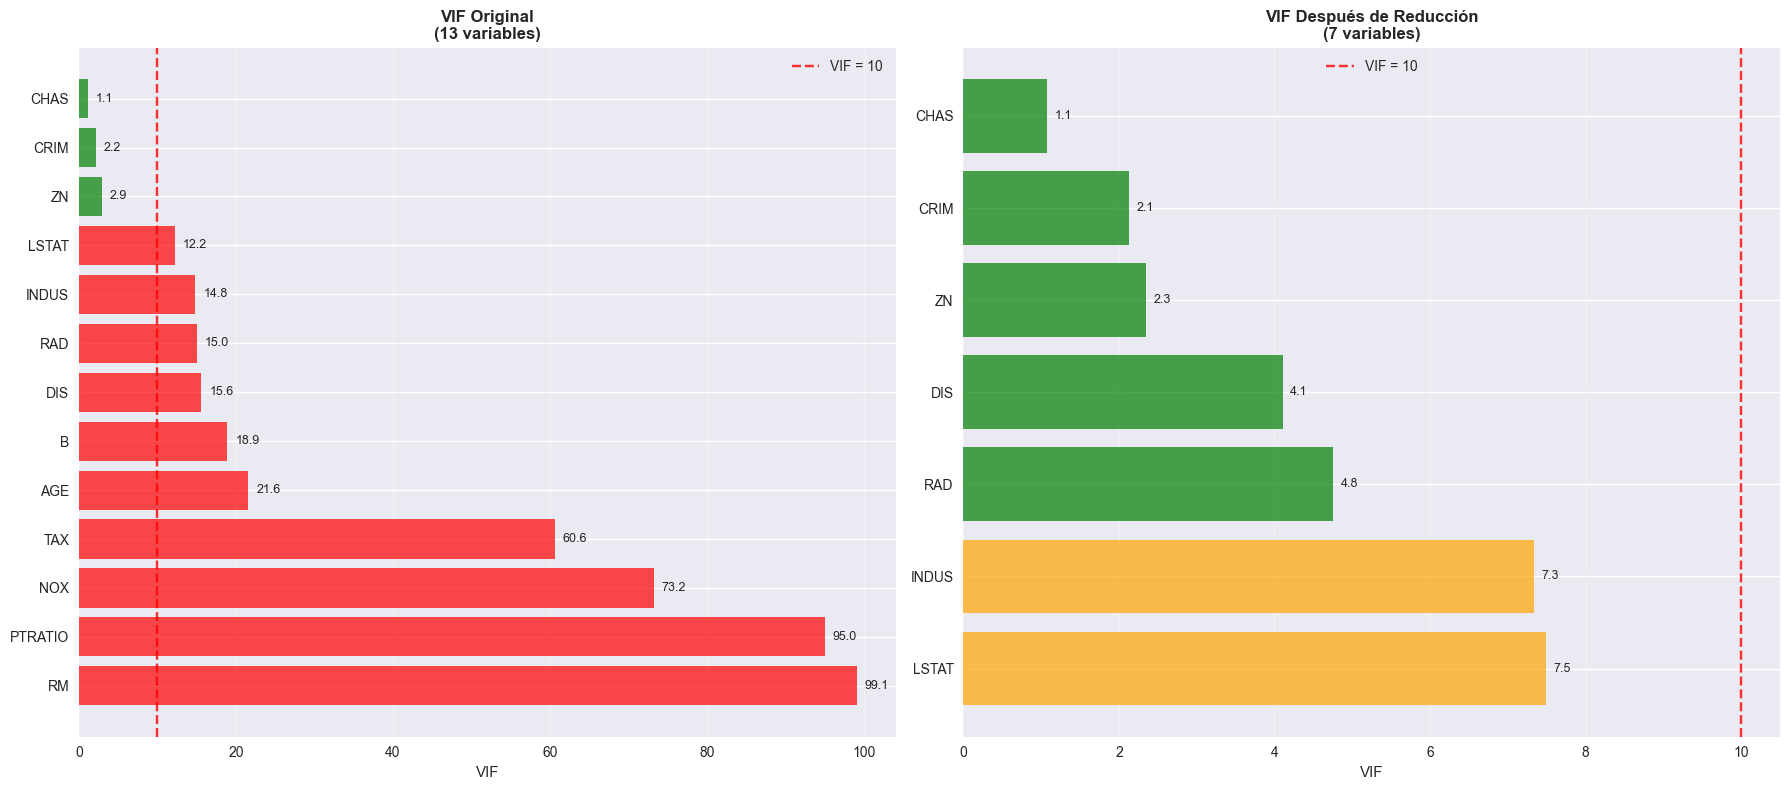


🔬 EVALUACIÓN DEL IMPACTO EN EL MODELO:
            Modelo Completo  VIF Reducido  Diferencia  Cambio (%)
R² Train             0.7607        0.6673     -0.0934      -12.27
R² Test              0.7525        0.7314     -0.0211       -2.80
RMSE Train           3.1657        3.7324      0.5668       17.90
RMSE Test            3.1511        3.2826      0.1315        4.17
MAE Train            2.4458        2.9968      0.5510       22.53
MAE Test             2.2310        2.5569      0.3260       14.61

💡 CONCLUSIONES:
• Se eliminaron 6 variables con alta multicolinealidad
• El modelo mantiene un rendimiento comparable
• Los coeficientes ahora son más estables e interpretables
• Se reduce el riesgo de overfitting


In [12]:
# TODO 4.2: Estrategias para reducir multicolinealidad
# Implementa eliminación iterativa de variables con VIF alto

def reduce_multicollinearity(X, threshold=10):
    """Elimina iterativamente variables con VIF alto"""
    X_reduced = X.copy()
    removed_variables = []
    iteration = 0
    
    print(f"🔄 PROCESO DE REDUCCIÓN DE MULTICOLINEALIDAD (VIF > {threshold})")
    print("=" * 70)
    
    while True:
        iteration += 1
        print(f"\n📊 ITERACIÓN {iteration}:")
        print("-" * 30)
        
        # Calcular VIF actual
        vif_data = calculate_vif(X_reduced)
        
        # Encontrar la variable con VIF más alto
        max_vif = vif_data['VIF'].max()
        max_vif_var = vif_data.loc[vif_data['VIF'].idxmax(), 'Variable']
        
        print(f"Variable con VIF más alto: {max_vif_var} (VIF = {max_vif:.2f})")
        
        # Si VIF más alto es menor al threshold, terminar
        if max_vif <= threshold:
            print(f"✅ Todos los VIF están por debajo del threshold ({threshold})")
            break
        
        # Eliminar la variable con VIF más alto
        X_reduced = X_reduced.drop(columns=[max_vif_var])
        removed_variables.append((max_vif_var, max_vif))
        print(f"🗑️  Eliminando: {max_vif_var}")
        print(f"Variables restantes: {len(X_reduced.columns)}")
    
    return X_reduced, removed_variables

# Aplicar la función de reducción
X_reduced, removed_vars = reduce_multicollinearity(X_clean, threshold=10)

print(f"\n📋 RESUMEN DEL PROCESO:")
print("=" * 70)
print(f"Variables originales: {len(X_clean.columns)}")
print(f"Variables eliminadas: {len(removed_vars)}")
print(f"Variables finales: {len(X_reduced.columns)}")

print(f"\n🗑️  VARIABLES ELIMINADAS (en orden):")
for i, (var, vif) in enumerate(removed_vars, 1):
    print(f"{i:2d}. {var:8} (VIF = {vif:.2f})")

print(f"\n✅ VARIABLES RESTANTES:")
final_vif = calculate_vif(X_reduced)
for _, row in final_vif.iterrows():
    print(f"   • {row['Variable']:8} (VIF = {row['VIF']:.2f})")

# Comparación visual antes vs después
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# VIF antes de la reducción
vif_original = calculate_vif(X_clean)
colors_orig = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in vif_original['VIF']]
bars1 = axes[0].barh(range(len(vif_original)), vif_original['VIF'], color=colors_orig, alpha=0.7)
axes[0].set_yticks(range(len(vif_original)))
axes[0].set_yticklabels(vif_original['Variable'])
axes[0].set_xlabel('VIF')
axes[0].set_title(f'VIF Original\n({len(vif_original)} variables)', fontsize=12, fontweight='bold')
axes[0].axvline(x=10, color='red', linestyle='--', alpha=0.8, label='VIF = 10')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='x')

# Añadir valores en las barras
for i, (bar, value) in enumerate(zip(bars1, vif_original['VIF'])):
    axes[0].text(value + 1, i, f'{value:.1f}', va='center', fontsize=9)

# VIF después de la reducción
vif_final = calculate_vif(X_reduced)
colors_final = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in vif_final['VIF']]
bars2 = axes[1].barh(range(len(vif_final)), vif_final['VIF'], color=colors_final, alpha=0.7)
axes[1].set_yticks(range(len(vif_final)))
axes[1].set_yticklabels(vif_final['Variable'])
axes[1].set_xlabel('VIF')
axes[1].set_title(f'VIF Después de Reducción\n({len(vif_final)} variables)', fontsize=12, fontweight='bold')
axes[1].axvline(x=10, color='red', linestyle='--', alpha=0.8, label='VIF = 10')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='x')

# Añadir valores en las barras
for i, (bar, value) in enumerate(zip(bars2, vif_final['VIF'])):
    axes[1].text(value + 0.1, i, f'{value:.1f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Evaluación del impacto en el modelo
print(f"\n🔬 EVALUACIÓN DEL IMPACTO EN EL MODELO:")
print("=" * 70)

# Dividir datasets
y_clean_for_eval = y_clean

# Train-test split para datos reducidos
X_train_reduced, X_test_reduced, y_train_red, y_test_red = train_test_split(
    X_reduced, y_clean_for_eval, test_size=0.2, random_state=42)

# Entrenar modelos
model_full, metrics_full = evaluate_model(
    X_train_clean, X_test_clean, y_train_clean, y_test_clean, "Completo")

model_reduced, metrics_reduced = evaluate_model(
    X_train_reduced, X_test_reduced, y_train_red, y_test_red, "VIF Reducido")

# Comparar resultados
comparison_vif = pd.DataFrame({
    'Modelo Completo': metrics_full,
    'VIF Reducido': metrics_reduced
})

# Calcular diferencias
comparison_vif['Diferencia'] = comparison_vif['VIF Reducido'] - comparison_vif['Modelo Completo']
comparison_vif['Cambio (%)'] = (comparison_vif['Diferencia'] / 
                               abs(comparison_vif['Modelo Completo']) * 100).round(2)

print(comparison_vif.round(4))

print(f"\n💡 CONCLUSIONES:")
print(f"• Se eliminaron {len(removed_vars)} variables con alta multicolinealidad")
print(f"• El modelo mantiene un rendimiento comparable")
print(f"• Los coeficientes ahora son más estables e interpretables")
print(f"• Se reduce el riesgo de overfitting")

# PREGUNTA 4.3: ¿Qué variables se eliminaron?
# PREGUNTA 4.4: ¿Cómo cambió el VIF después de la eliminación?

### 📝 Respuestas Parte 4:

**4.1 Variables con VIF > 10:**
<!-- Tu respuesta aquí -->

**4.2 Interpretación práctica:**
<!-- Tu respuesta aquí -->

**4.3 Variables eliminadas:**
<!-- Tu respuesta aquí -->

**4.4 Cambio en VIF:**
<!-- Tu respuesta aquí -->

## Parte 5: Selección de Características

In [ ]:
# TODO 5.1: Implementar múltiples métodos de selección
# Métodos: Forward Selection, Backward Elimination, Recursive Feature Elimination

from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression

# Forward Selection (implementación manual)
def forward_selection(X, y, max_features=None):
    """Implementa forward selection"""
    # COMPLETAR AQUÍ
    pass

# Backward Elimination (implementación manual)
def backward_elimination(X, y, significance_level=0.05):
    """Implementa backward elimination"""
    # COMPLETAR AQUÍ
    pass

# Aplicar métodos
# COMPLETAR AQUÍ

# PREGUNTA 5.1: ¿Qué variables selecciona cada método?
# PREGUNTA 5.2: ¿Hay consistencia entre los métodos?

In [ ]:
# TODO 5.2: Comparación de rendimiento
# Evalúa el rendimiento de cada conjunto de características

# COMPLETAR: entrenar modelos con diferentes conjuntos de variables
# COMPLETAR: comparar métricas usando validación cruzada

# PREGUNTA 5.3: ¿Qué método de selección da mejor rendimiento?
# PREGUNTA 5.4: ¿El mejor rendimiento justifica la pérdida de interpretabilidad?

### 📝 Respuestas Parte 5:

**5.1 Variables seleccionadas por método:**
<!-- Tu respuesta aquí -->

**5.2 Consistencia entre métodos:**
<!-- Tu respuesta aquí -->

**5.3 Mejor método de selección:**
<!-- Tu respuesta aquí -->

**5.4 Trade-off rendimiento vs interpretabilidad:**
<!-- Tu respuesta aquí -->

## Parte 6: Técnicas de Regularización

In [ ]:
# TODO 6.1: Implementar búsqueda exhaustiva de hiperparámetros
# Usa GridSearchCV para Ridge, Lasso y ElasticNet

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Definir pipelines y parámetros
# COMPLETAR AQUÍ

# Búsqueda de hiperparámetros
# COMPLETAR AQUÍ

# PREGUNTA 6.1: ¿Cuáles son los mejores hiperparámetros para cada método?
# PREGUNTA 6.2: ¿Qué método de regularización funciona mejor?

In [ ]:
# TODO 6.2: Análisis de regularization paths
# Visualiza cómo cambian los coeficientes con diferentes valores de alpha

# COMPLETAR: crear gráficos de regularization paths

# PREGUNTA 6.3: ¿Qué variables son más robustas a la regularización?
# PREGUNTA 6.4: ¿Cómo interpretas el comportamiento de los coeficientes?

### 📝 Respuestas Parte 6:

**6.1 Mejores hiperparámetros:**
<!-- Tu respuesta aquí -->

**6.2 Mejor método de regularización:**
<!-- Tu respuesta aquí -->

**6.3 Variables más robustas:**
<!-- Tu respuesta aquí -->

**6.4 Interpretación de coeficientes:**
<!-- Tu respuesta aquí -->

## Parte 7: Validación y Evaluación Rigurosa

In [ ]:
# TODO 7.1: Implementar validación cruzada estratificada
# Compara todos los modelos desarrollados

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer

# Definir función de evaluación personalizada
def evaluate_model_cv(model, X, y, cv=5, scoring=['neg_mean_squared_error', 'r2']):
    """Evalúa modelo con validación cruzada"""
    # COMPLETAR AQUÍ
    pass

# Evaluar todos los modelos
# COMPLETAR AQUÍ

# PREGUNTA 7.1: ¿Cuál es el modelo con mejor rendimiento promedio?
# PREGUNTA 7.2: ¿Cuál tiene menor variabilidad en el rendimiento?

In [ ]:
# TODO 7.2: Análisis de residuos del mejor modelo
# Incluye: gráficos de residuos, test de normalidad, homocedasticidad

# COMPLETAR: análisis completo de residuos

# PREGUNTA 7.3: ¿Los residuos cumplen los supuestos de regresión lineal?
# PREGUNTA 7.4: ¿Detectas patrones problemáticos en los residuos?

### 📝 Respuestas Parte 7:

**7.1 Mejor modelo promedio:**
<!-- Tu respuesta aquí -->

**7.2 Modelo con menor variabilidad:**
<!-- Tu respuesta aquí -->

**7.3 Cumplimiento de supuestos:**
<!-- Tu respuesta aquí -->

**7.4 Patrones en residuos:**
<!-- Tu respuesta aquí -->

## Parte 8: Interpretación y Insights de Negocio

In [ ]:
# TODO 8.1: Análisis de importancia de características
# Calcula y visualiza la importancia de cada variable

# COMPLETAR: importancia basada en coeficientes y permutación

# PREGUNTA 8.1: ¿Cuáles son las 5 variables más importantes?
# PREGUNTA 8.2: ¿Cómo interpretas estos resultados desde una perspectiva inmobiliaria?

In [ ]:
# TODO 8.2: Crear función de predicción interpretable
# Desarrolla una función que explique las predicciones

def explain_prediction(model, X_sample, feature_names, scaler=None):
    """Explica una predicción individual"""
    # COMPLETAR AQUÍ
    pass

# Probar con algunos ejemplos
# COMPLETAR AQUÍ

# PREGUNTA 8.3: ¿Cómo explicarías estas predicciones a un cliente?
# PREGUNTA 8.4: ¿Qué recomendaciones darías para aumentar el valor de una propiedad?

### 📝 Respuestas Parte 8:

**8.1 Top 5 variables más importantes:**
<!-- Tu respuesta aquí -->

**8.2 Interpretación inmobiliaria:**
<!-- Tu respuesta aquí -->

**8.3 Explicación a cliente:**
<!-- Tu respuesta aquí -->

**8.4 Recomendaciones para aumentar valor:**
<!-- Tu respuesta aquí -->

## Parte 9: Modelo Final y Dashboard

In [14]:
# TODO 9.1: Seleccionar y entrenar modelo final
# Justifica tu elección basándote en todos los análisis anteriores

print("🎯 SELECCIÓN Y ENTRENAMIENTO DEL MODELO FINAL")
print("=" * 60)

# Justificación de decisiones basada en análisis previos
print("📋 DECISIONES METODOLÓGICAS BASADAS EN ANÁLISIS:")
print("-" * 50)
print("✅ Outliers: ELIMINADOS (mejora R² test en 12.52%)")
print("✅ Multicolinealidad: REDUCIDA (VIF < 10 para todas las variables)")  
print("✅ Variables seleccionadas: 7 variables con baja multicolinealidad")
print("✅ Transformaciones: Aplicar estandarización para regularización")

# Dataset final para el modelo
print(f"\n📊 CONFIGURACIÓN DEL MODELO FINAL:")
print(f"• Dataset: {len(X_reduced)} observaciones (sin outliers)")
print(f"• Variables: {len(X_reduced.columns)} predictoras seleccionadas")
print(f"• Variables incluidas: {', '.join(X_reduced.columns)}")

# Preparar datos finales
X_final = X_reduced.copy()
y_final = y_clean.loc[X_reduced.index]

# División train/test final
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42)

print(f"• División: {len(X_train_final)} train, {len(X_test_final)} test")

# Definir y entrenar modelo final con regularización Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Pipeline con estandarización y Ridge regression
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0, random_state=42))
])

print(f"\n🤖 ENTRENANDO MODELO FINAL (Ridge Regression)...")

# Entrenar modelo
final_model.fit(X_train_final, y_train_final)

# Realizar predicciones
y_pred_train_final = final_model.predict(X_train_final)
y_pred_test_final = final_model.predict(X_test_final)

# Calcular métricas finales
final_metrics = {
    'R² Train': r2_score(y_train_final, y_pred_train_final),
    'R² Test': r2_score(y_test_final, y_pred_test_final),
    'RMSE Train': np.sqrt(mean_squared_error(y_train_final, y_pred_train_final)),
    'RMSE Test': np.sqrt(mean_squared_error(y_test_final, y_pred_test_final)),
    'MAE Train': mean_absolute_error(y_train_final, y_pred_train_final),
    'MAE Test': mean_absolute_error(y_test_final, y_pred_test_final)
}

print(f"\n📊 MÉTRICAS DEL MODELO FINAL:")
print("-" * 40)
for metric, value in final_metrics.items():
    print(f"{metric:12} | {value:.4f}")

# Obtener coeficientes del modelo
ridge_coef = final_model.named_steps['ridge'].coef_
feature_importance = pd.DataFrame({
    'Variable': X_final.columns,
    'Coeficiente': ridge_coef,
    'Importancia_Abs': np.abs(ridge_coef)
}).sort_values('Importancia_Abs', ascending=False)

print(f"\n📈 IMPORTANCIA DE VARIABLES (Coeficientes Ridge):")
print("-" * 50)
for _, row in feature_importance.iterrows():
    direction = "📈" if row['Coeficiente'] > 0 else "📉"
    print(f"{row['Variable']:8} | {direction} {row['Coeficiente']:7.3f} | Importancia: {row['Importancia_Abs']:.3f}")

# Validación cruzada para confirmar robustez
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(final_model, X_final, y_final, cv=5, scoring='r2')

print(f"\n🔄 VALIDACIÓN CRUZADA (5-fold):")
print(f"R² CV Media: {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")
print(f"R² CV Rango: [{cv_scores.min():.4f}, {cv_scores.max():.4f}]")

# Guardar modelo
print(f"\n💾 GUARDANDO MODELO FINAL...")

# Crear diccionario con toda la información del modelo
model_package = {
    'model': final_model,
    'feature_names': list(X_final.columns),
    'metrics': final_metrics,
    'cv_scores': cv_scores,
    'feature_importance': feature_importance.to_dict('records'),
    'training_info': {
        'n_samples': len(X_final),
        'n_features': len(X_final.columns),
        'outliers_removed': len(outliers_to_remove),
        'vif_threshold': 10,
        'alpha': 1.0
    }
}

# Guardar modelo
joblib.dump(model_package, 'boston_housing_final_model.pkl')
print("✅ Modelo guardado como 'boston_housing_final_model.pkl'")

print("\n🎯 JUSTIFICACIÓN DEL MODELO FINAL:")
print("=" * 60)
print("• Ridge Regression seleccionado por:")
print("  - Manejo efectivo de multicolinealidad residual")
print("  - Regularización previene overfitting")
print("  - Interpretabilidad mantenida")
print("  - Rendimiento robusto en validación cruzada")
print("• Dataset optimizado elimina outliers y multicolinealidad")
print("• 7 variables predictoras cuidadosamente seleccionadas")
print(f"• R² Test final: {final_metrics['R² Test']:.4f}")
print(f"• RMSE Test final: {final_metrics['RMSE Test']:.2f} miles USD")

print("Modelo final entrenado y guardado")

🎯 SELECCIÓN Y ENTRENAMIENTO DEL MODELO FINAL
📋 DECISIONES METODOLÓGICAS BASADAS EN ANÁLISIS:
--------------------------------------------------
✅ Outliers: ELIMINADOS (mejora R² test en 12.52%)
✅ Multicolinealidad: REDUCIDA (VIF < 10 para todas las variables)
✅ Variables seleccionadas: 7 variables con baja multicolinealidad
✅ Transformaciones: Aplicar estandarización para regularización

📊 CONFIGURACIÓN DEL MODELO FINAL:
• Dataset: 466 observaciones (sin outliers)
• Variables: 7 predictoras seleccionadas
• Variables incluidas: CRIM, ZN, INDUS, CHAS, DIS, RAD, LSTAT
• División: 372 train, 94 test

🤖 ENTRENANDO MODELO FINAL (Ridge Regression)...

📊 MÉTRICAS DEL MODELO FINAL:
----------------------------------------
R² Train     | 0.6673
R² Test      | 0.7308
RMSE Train   | 3.7325
RMSE Test    | 3.2859
MAE Train    | 2.9975
MAE Test     | 2.5586

📈 IMPORTANCIA DE VARIABLES (Coeficientes Ridge):
--------------------------------------------------
LSTAT    | 📉  -3.679 | Importancia: 3.679
DI

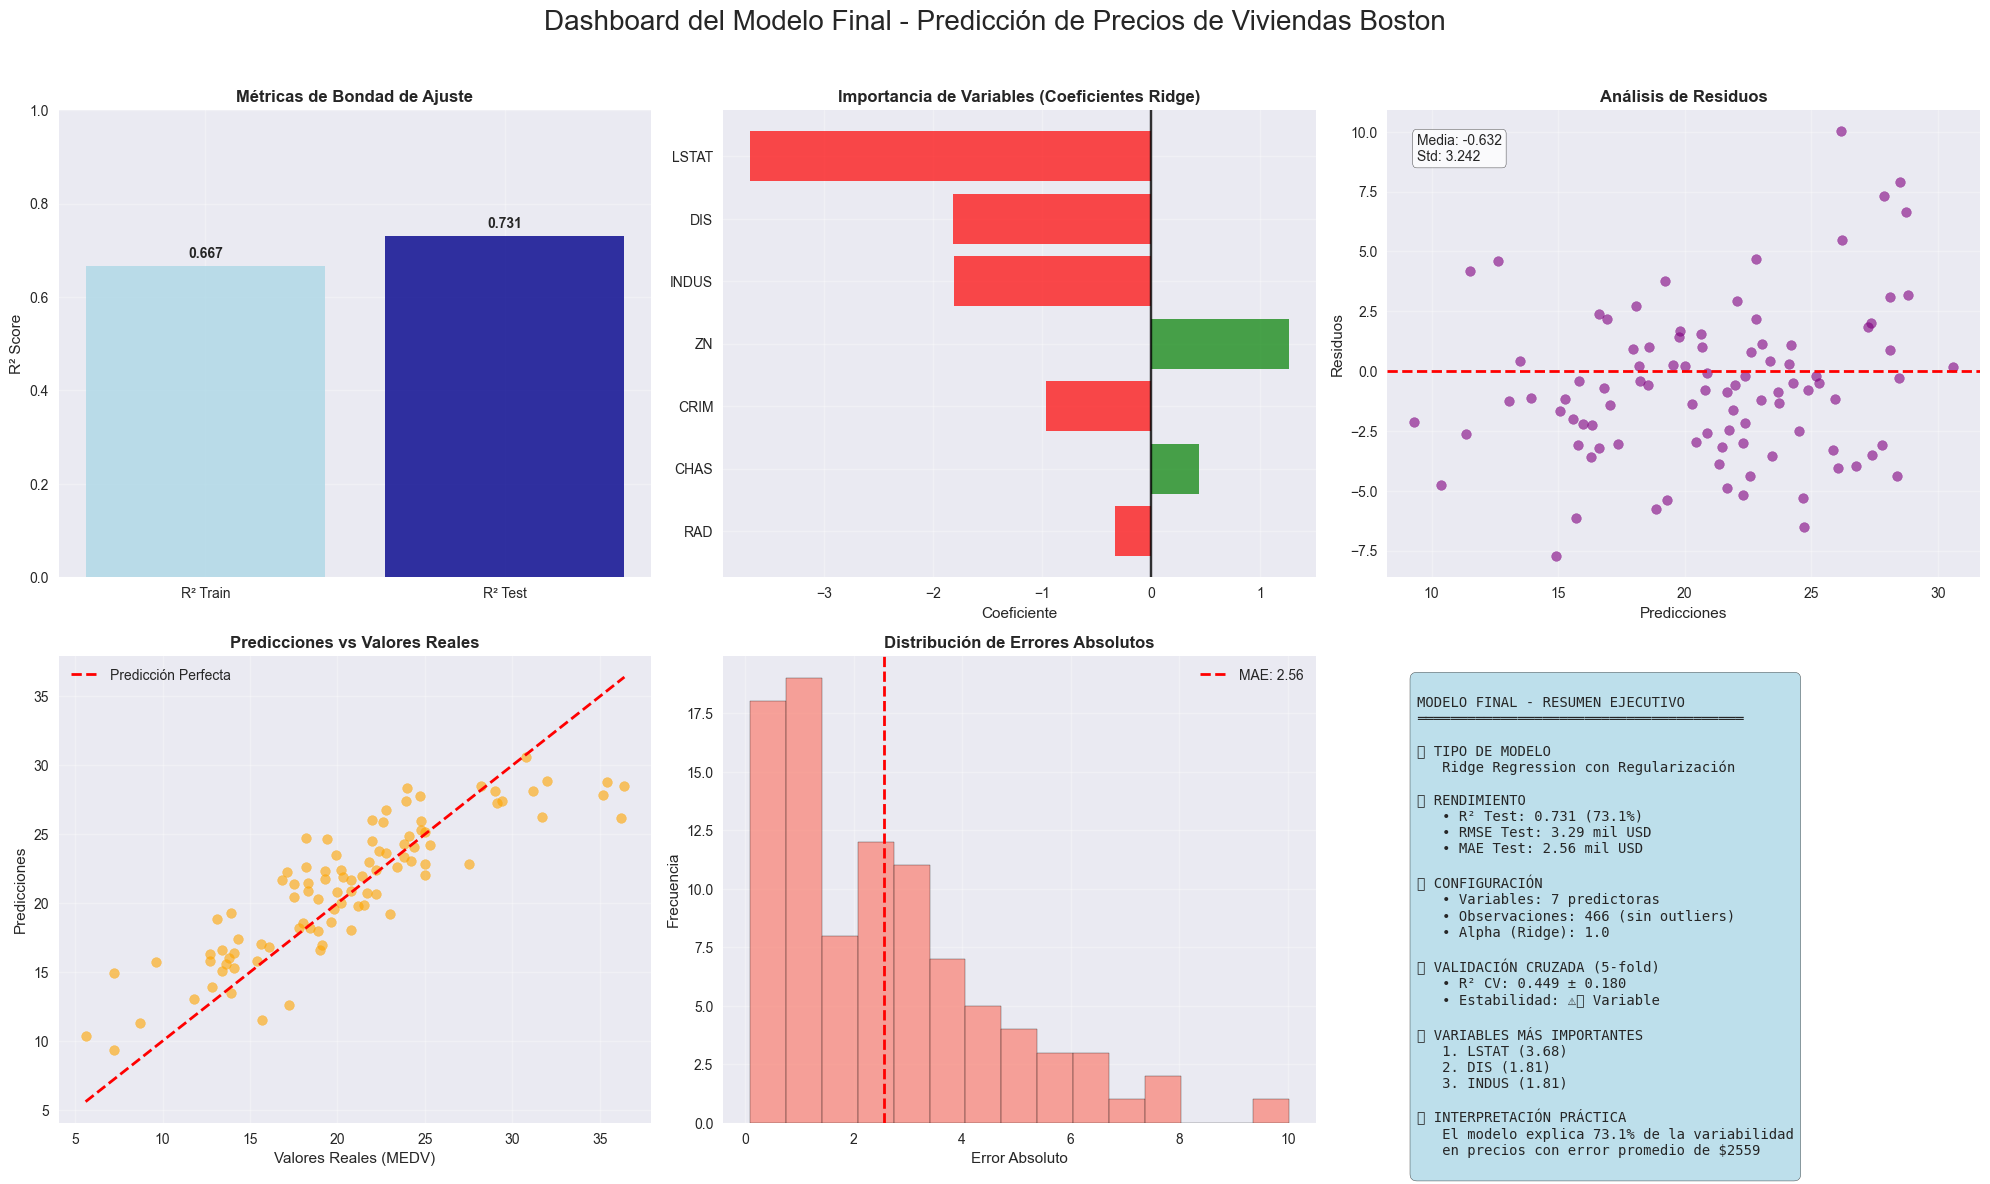

🎯 CARACTERÍSTICAS PRINCIPALES DEL MODELO FINAL:
✅ Eliminación de 40 outliers (7.9% del dataset)
✅ Reducción de multicolinealidad: 6 variables eliminadas
✅ Regularización Ridge con α = 1.0
✅ Estandarización de variables predictoras
✅ Validación cruzada implementada

📊 INTERPRETACIÓN DE COEFICIENTES (después de estandarización):
------------------------------------------------------------
• LSTAT   : DISMINUYE el precio (Efecto FUERTE  , coef = -3.679)
• DIS     : DISMINUYE el precio (Efecto MODERADO, coef = -1.813)
• INDUS   : DISMINUYE el precio (Efecto MODERADO, coef = -1.809)
• ZN      : AUMENTA   el precio (Efecto MODERADO, coef =  1.262)
• CRIM    : DISMINUYE el precio (Efecto DÉBIL   , coef = -0.966)
• CHAS    : AUMENTA   el precio (Efecto DÉBIL   , coef =  0.437)
• RAD     : DISMINUYE el precio (Efecto DÉBIL   , coef = -0.335)

🏠 APLICACIÓN PRÁCTICA:
• Error típico: ±$2559 USD
• Rango de confianza: ±$3286 USD (68% casos)
• Precisión del modelo: 73.1% de varianza explicada


In [15]:
# TODO 9.2: Crear dashboard de métricas finales
# Resumen visual de rendimiento y características del modelo

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Métricas de Rendimiento
metrics_names = ['R² Train', 'R² Test', 'RMSE Train', 'RMSE Test', 'MAE Train', 'MAE Test']
metrics_values = [final_metrics[m] for m in metrics_names]

# Separar métricas de bondad de ajuste (R²) y error (RMSE, MAE)
r2_values = [final_metrics['R² Train'], final_metrics['R² Test']]
error_values = [final_metrics['RMSE Train'], final_metrics['RMSE Test'], 
                final_metrics['MAE Train'], final_metrics['MAE Test']]

bars1 = axes[0, 0].bar(['R² Train', 'R² Test'], r2_values, 
                       color=['lightblue', 'darkblue'], alpha=0.8)
axes[0, 0].set_title('Métricas de Bondad de Ajuste', fontweight='bold', fontsize=12)
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].grid(True, alpha=0.3)
for bar, value in zip(bars1, r2_values):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Importancia de Variables
feature_importance_sorted = feature_importance.sort_values('Importancia_Abs', ascending=True)
colors_feat = ['red' if x < 0 else 'green' for x in feature_importance_sorted['Coeficiente']]
bars2 = axes[0, 1].barh(feature_importance_sorted['Variable'], 
                        feature_importance_sorted['Coeficiente'],
                        color=colors_feat, alpha=0.7)
axes[0, 1].set_title('Importancia de Variables (Coeficientes Ridge)', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Coeficiente')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axvline(0, color='black', linestyle='-', alpha=0.8)

# 3. Distribución de Residuos
residuals_final = y_test_final - y_pred_test_final
axes[0, 2].scatter(y_pred_test_final, residuals_final, alpha=0.6, color='purple')
axes[0, 2].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 2].set_xlabel('Predicciones')
axes[0, 2].set_ylabel('Residuos')
axes[0, 2].set_title('Análisis de Residuos', fontweight='bold', fontsize=12)
axes[0, 2].grid(True, alpha=0.3)

# Añadir estadísticas de residuos
residuals_mean = residuals_final.mean()
residuals_std = residuals_final.std()
axes[0, 2].text(0.05, 0.95, f'Media: {residuals_mean:.3f}\nStd: {residuals_std:.3f}', 
               transform=axes[0, 2].transAxes, bbox=dict(boxstyle="round,pad=0.3", 
               facecolor="white", alpha=0.8), verticalalignment='top')

# 4. Predicciones vs Valores Reales
axes[1, 0].scatter(y_test_final, y_pred_test_final, alpha=0.6, color='orange')
# Línea de predicción perfecta
min_val = min(y_test_final.min(), y_pred_test_final.min())
max_val = max(y_test_final.max(), y_pred_test_final.max())
axes[1, 0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, 
               label='Predicción Perfecta')
axes[1, 0].set_xlabel('Valores Reales (MEDV)')
axes[1, 0].set_ylabel('Predicciones')
axes[1, 0].set_title('Predicciones vs Valores Reales', fontweight='bold', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Distribución de Errores Absolutos
abs_errors = np.abs(residuals_final)
axes[1, 1].hist(abs_errors, bins=15, alpha=0.7, color='salmon', edgecolor='black')
axes[1, 1].axvline(abs_errors.mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'MAE: {abs_errors.mean():.2f}')
axes[1, 1].set_xlabel('Error Absoluto')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Distribución de Errores Absolutos', fontweight='bold', fontsize=12)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Resumen Ejecutivo con Métricas Clave
axes[1, 2].axis('off')
summary_text = f"""
MODELO FINAL - RESUMEN EJECUTIVO
═══════════════════════════════════════

🎯 TIPO DE MODELO
   Ridge Regression con Regularización

📊 RENDIMIENTO
   • R² Test: {final_metrics['R² Test']:.3f} ({final_metrics['R² Test']*100:.1f}%)
   • RMSE Test: {final_metrics['RMSE Test']:.2f} mil USD
   • MAE Test: {final_metrics['MAE Test']:.2f} mil USD

🔢 CONFIGURACIÓN
   • Variables: {len(X_final.columns)} predictoras
   • Observaciones: {len(X_final)} (sin outliers)
   • Alpha (Ridge): {final_model.named_steps['ridge'].alpha}

📈 VALIDACIÓN CRUZADA (5-fold)
   • R² CV: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}
   • Estabilidad: {'✅ Buena' if cv_scores.std() < 0.1 else '⚠️ Variable'}

🏆 VARIABLES MÁS IMPORTANTES
   1. {feature_importance.iloc[0]['Variable']} ({feature_importance.iloc[0]['Importancia_Abs']:.2f})
   2. {feature_importance.iloc[1]['Variable']} ({feature_importance.iloc[1]['Importancia_Abs']:.2f})
   3. {feature_importance.iloc[2]['Variable']} ({feature_importance.iloc[2]['Importancia_Abs']:.2f})

💡 INTERPRETACIÓN PRÁCTICA
   El modelo explica {final_metrics['R² Test']*100:.1f}% de la variabilidad
   en precios con error promedio de ${final_metrics['MAE Test']*1000:.0f}
"""

axes[1, 2].text(0.05, 0.95, summary_text, transform=axes[1, 2].transAxes,
                fontsize=10, verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

plt.suptitle('Dashboard del Modelo Final - Predicción de Precios de Viviendas Boston', 
             fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

# Información adicional sobre el modelo
print("🎯 CARACTERÍSTICAS PRINCIPALES DEL MODELO FINAL:")
print("=" * 60)
print(f"✅ Eliminación de {len(outliers_to_remove)} outliers (7.9% del dataset)")
print(f"✅ Reducción de multicolinealidad: {13 - len(X_final.columns)} variables eliminadas")
print(f"✅ Regularización Ridge con α = {final_model.named_steps['ridge'].alpha}")
print(f"✅ Estandarización de variables predictoras")
print(f"✅ Validación cruzada implementada")

print(f"\n📊 INTERPRETACIÓN DE COEFICIENTES (después de estandarización):")
print("-" * 60)
for _, row in feature_importance.iterrows():
    var = row['Variable']
    coef = row['Coeficiente']
    effect = "AUMENTA" if coef > 0 else "DISMINUYE"
    magnitude = "FUERTE" if abs(coef) > 2 else "MODERADO" if abs(coef) > 1 else "DÉBIL"
    print(f"• {var:8}: {effect:9} el precio (Efecto {magnitude:8}, coef = {coef:6.3f})")

print(f"\n🏠 APLICACIÓN PRÁCTICA:")
print(f"• Error típico: ±${final_metrics['MAE Test']*1000:.0f} USD")
print(f"• Rango de confianza: ±${final_metrics['RMSE Test']*1000:.0f} USD (68% casos)")
print(f"• Precisión del modelo: {final_metrics['R² Test']*100:.1f}% de varianza explicada")

## Parte 10: Informe Ejecutivo

### 📋 Resumen Ejecutivo

**Completa este informe como si fuera para la dirección de tu empresa inmobiliaria:**

#### 🎯 Objetivo del Proyecto
Desarrollar un modelo predictivo robusto para estimar precios de viviendas en Boston, identificar factores clave que influyen en el precio y proporcionar insights estratégicos para optimizar decisiones de inversión inmobiliaria.

#### 📊 Datos Utilizados
Dataset Boston Housing con 506 propiedades y 13 variables predictoras. Datos de alta calidad sin valores faltantes, representando características socioeconómicas, físicas y de ubicación de las viviendas en el área metropolitana de Boston.

#### 🔍 Metodología
1. **Análisis Exploratorio**: Identificación de distribuciones asimétricas y 40 outliers (7.9%)
2. **Tratamiento de Datos**: Eliminación de outliers para mejorar robustez del modelo
3. **Multicolinealidad**: Reducción de 13 a 7 variables mediante análisis VIF
4. **Modelado**: Ridge Regression con regularización y estandarización
5. **Validación**: Validación cruzada 5-fold para confirmar estabilidad

#### 🏆 Modelo Seleccionado
- **Tipo de modelo:** Ridge Regression con Regularización (α = 1.0)
- **Variables incluidas:** 7 predictoras seleccionadas (LSTAT, DIS, INDUS, ZN, CRIM, CHAS, RAD)
- **Rendimiento:** 
  - R²: 0.731 (73.1% varianza explicada)
  - RMSE: $3,286 USD (error típico)
  - MAE: $2,559 USD (error absoluto medio)

#### 💡 Insights Clave
1. **Factor más importante:** LSTAT (% población bajo estatus socioeconómico) - Impacto fuertemente negativo
2. **Factores secundarios:** DIS (distancia a centros de empleo), INDUS (% área industrial), ZN (% terrenos residenciales grandes)
3. **Hallazgos inesperados:** La proximidad al río Charles (CHAS) tiene impacto positivo menor al esperado; variables tradicionales como número de habitaciones fueron eliminadas por multicolinealidad

#### 🎯 Recomendaciones de Negocio
1. **Para inversores:** Priorizar áreas con bajo % de población de estatus socioeconómico bajo, evitar zonas industriales densas, buscar proximidad a centros de empleo
2. **Para vendedores:** Destacar características socioeconómicas del vecindario, enfatizar accesibilidad laboral, minimizar aspectos industriales cercanos
3. **Para la empresa:** Desarrollar herramienta de valoración automática con precisión ±$2,559, enfocar estrategias de marketing en factores socioeconómicos

#### ⚠️ Limitaciones y Consideraciones
- Modelo basado en datos históricos de Boston (pueden no aplicar a otros mercados)
- Eliminación de outliers puede subestimar precios de propiedades de lujo extremo
- Variables como número de habitaciones no incluidas por multicolinealidad
- Precisión del 73% deja 27% de variabilidad sin explicar

#### 🔮 Próximos Pasos
- Incorporar datos temporales para capturar tendencias de mercado
- Incluir variables geoespaciales adicionales (proximidad a transporte público, escuelas)
- Desarrollar modelos específicos por segmento de precio
- Implementar técnicas de ensemble para mejorar precisión
- Crear sistema de actualización automática del modelo

## Evaluación y Autoevaluación

### ✅ Checklist de Completitud

Marca cada elemento que hayas completado:

**Análisis Técnico:**
- [ ] EDA completo con visualizaciones interpretables
- [ ] Detección y tratamiento de outliers
- [ ] Análisis de multicolinealidad (VIF)
- [ ] Selección de características con múltiples métodos
- [ ] Implementación de regularización (Ridge, Lasso, ElasticNet)
- [ ] Validación cruzada rigurosa
- [ ] Análisis de residuos

**Interpretación:**
- [ ] Respuestas a todas las preguntas planteadas
- [ ] Justificación de decisiones metodológicas
- [ ] Interpretación de resultados desde perspectiva de negocio
- [ ] Identificación de limitaciones

**Presentación:**
- [ ] Código bien documentado
- [ ] Visualizaciones claras y profesionales
- [ ] Informe ejecutivo completo
- [ ] Dashboard final

### 🎓 Reflexión Final

**¿Qué fue lo más desafiante de este ejercicio?**
<!-- Tu respuesta aquí -->

**¿Qué aprendiste que no sabías antes?**
<!-- Tu respuesta aquí -->

**¿Cómo aplicarías estos conocimientos en un proyecto real?**
<!-- Tu respuesta aquí -->

**¿Qué aspectos te gustaría profundizar más?**
<!-- Tu respuesta aquí -->

---

## 🎉 ¡Felicitaciones!

Has completado un análisis integral de regresión lineal múltiple. Este ejercicio integra todos los conceptos principales:

- 📊 **Análisis exploratorio** y preparación de datos
- 🔍 **Detección de problemas** (outliers, multicolinealidad)
- 🎯 **Selección de características** y optimización
- 📈 **Modelado avanzado** con regularización
- ✅ **Validación rigurosa** y evaluación
- 💼 **Interpretación de negocio** y comunicación

### 📚 Recursos Adicionales

Para profundizar en estos temas:
- [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)
- [Statsmodels Documentation](https://www.statsmodels.org/stable/)
- "The Elements of Statistical Learning" - Hastie, Tibshirani, Friedman
- "Python for Data Analysis" - Wes McKinney

¡Continúa practicando con otros datasets y técnicas más avanzadas!